In [1]:
# add all necessary imports
from tqdm import tqdm
from convokit import Corpus, Speaker, Utterance
from collections import defaultdict
import pandas as pd
import pprint as pp
from IPython.display import display
from modules.DataPreprocesser import DataPreprocesser
import sys
import os

In [2]:
filepath = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/alldyads.csv"
final_filepath = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/preprocessed_dyads.csv"
data_preprocessor = DataPreprocesser(filepath)

#data_preprocessor.addParsedTextColumn("formattedChat", "parsed_dialog")

data = data_preprocessor.df.copy() 
#data["parsed_dialog"]
orig_data =pd.read_csv(filepath)
#display(data_preprocessor.utterancesDF)

2882


In [3]:
print(data.shape)
print(orig_data.shape)

(2882, 53)
(2891, 50)


# Dataset Analysis and Pre-processing

### Example of parsedText Column

In [4]:
data_preprocessor.getDataframe()["parsed_dialog"][0]

[{'timestamp': 'nan',
  'speaker': 'Seller',
  'message': 'Your sudden demand for a refund is unwarranted. Our product description is crystal clear, and we stand by our policy. Your behavior is disappointing, and your negative review is unfounded.',
  'uttidx': 0,
  'speaker_id': 'Seller_0',
  'is_AI': True,
  'row_idx': 0,
  'match_idx': False,
  'Case Match Type': None},
 {'timestamp': 1699388150,
  'speaker': 'Buyer',
  'message': 'This was not the item I ordered, please provide a full refund.  I will ship the item back.',
  'uttidx': 1,
  'speaker_id': 'Buyer_0',
  'is_AI': False,
  'row_idx': 0,
  'match_idx': False,
  'Case Match Type': None},
 {'timestamp': 1699388170,
  'speaker': 'Seller',
  'message': 'How about a compromise? I can offer you a partial refund, and in exchange, you would remove your negative review that wrongly portrays my business.',
  'uttidx': 2,
  'speaker_id': 'Seller_0',
  'is_AI': True,
  'row_idx': 0,
  'match_idx': False,
  'Case Match Type': None},
 {

### Example of Utterance Dataframe

In [5]:
data_preprocessor.getUtterancesDF()

timestamp speaker                                            message  \
0             nan  Seller  Your sudden demand for a refund is unwarranted...   
1      1699388150   Buyer  This was not the item I ordered, please provid...   
2      1699388170  Seller  How about a compromise? I can offer you a part...   
3      1699388217   Buyer  No, this was not the item I ordered. I have a ...   
4      1699388235  Seller  I can scrutinize your claim, but this requires...   
...           ...     ...                                                ...   
39841  1718879890   Buyer  Thank you I appreciate that.  I shall remove m...   
39842  1718879909  Seller  Deal. Once I see changes on your end, I'll ini...   
39843  1718879998   Buyer  I understand - please do follow through.  I ha...   
39844  1718880018  Seller  You have my word, I will follow through. A sna...   
39845  1718880039   Buyer  Submitted agreement: Buyer gets full refund, b...   

       uttidx   speaker_id  is_AI  row_idx  match_idx Case Match Type  \
0           0     Seller_0   True        0      False            None   
1           1      Buyer_0  False        0      False            None   
2           2     Seller_0   True        0      False            None   
3           3      Buyer_0  False        0      False            None   
4           4     Seller_0   True        0      False            None   
...       ...          ...    ...      ...        ...             ...   
39841       5   Buyer_2881  False     2881      False            None   
39842       6  Seller_2881   True     2881      False            None   
39843       7   Buyer_2881  False     2881      False            None   
39844       8  Seller_2881   True     2881      False            None   
39845       9   Buyer_2881  False     2881      False            None   

       convo_len  
0             16  
1             16  
2             16  
3             16  
4             16  
...          ...  
39841         10  
39842         10  
39843         10  
39844         10  
39845         10  

[39846 rows x 10 columns]

### Entire Dataframe

In [6]:
data_preprocessor.getDataframe()

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
0         187.0         80.0         12.0          5.0          3.0       1.0   
1         187.0         40.0         10.0         31.0         19.0       3.0   
2         187.0         40.0         10.0         30.0         20.0       2.0   
3           NaN          NaN          NaN          NaN          NaN       NaN   
4           NaN          NaN          NaN          NaN          NaN       NaN   
...         ...          ...          ...          ...          ...       ...   
2877      161.0         50.0         10.0         20.0         20.0       NaN   
2878      185.0         60.0         10.0         30.0          0.0       NaN   
2879      185.0         50.0         10.0         30.0         10.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   
2881      185.0         40.0         20.0         30.0         10.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
0          4.0       5.0       NaN       1.0  ...     NaN         NaN   
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
2          4.0       4.0       NaN       3.0  ...     NaN         NaN   
3          NaN       NaN       NaN       NaN  ...     NaN         NaN   
4          NaN       NaN       NaN       NaN  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2877       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2878       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2879       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   
2881       NaN       NaN       NaN       NaN  ...     NaN         NaN   

                                            s_AI-cues.1  is_AI  \
0                                                   NaN   True   
1                                                   NaN  False   
2                                                   NaN   True   
3                                                   NaN   True   
4                                                   NaN   True   
...                                                 ...    ...   
2877                                                NaN   True   
2878                                                NaN   True   
2879                                                NaN   True   
2880  It souunded too good to be true yet so human a...  False   
2881                                                NaN   True   

                                          formattedChat  b_insight s_insight  \
0     nan Seller: Your sudden demand for a refund is...        NaN       NaN   
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
2     nan Seller: Your sudden demand for a refund is...        NaN       NaN   
3     nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
4     nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
...                                                 ...        ...       ...   
2877  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2878  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2879  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   
2881  nan Seller: Your sudden demand for a refund is...        NaN       NaN   

                                          parsed_dialog flag_speaker  \
0     [{'timestamp': 'nan', 'speaker': 'Seller', 'me...          0.0   
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
2     [{'timestamp': 'nan', 'speaker': 'Seller', 'me...          NaN   
3     [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...          NaN   
4     [{'timestamp': 'nan', 'speaker': 'Bu

# Find all Formatted Chats with Dispute Outcomes

can select "Walk Away" after at least 8 chat messages
Buyers always begin the negotiation (unless one participant is an AI, then the AI always goes first). Participants alternate sending messages; the participant’s interface becomes inactive while awaiting a new message.

**Info:**
- Many chats have "Your sudden demand is unwarranted" for  -> implies AI is Seller
- Many chats have "Your response is utterly unacceptable" for buyer -> implies AI is Buyer
- when submitted agreement is last dialogue -> probably AI

**Not very clear when a formatted chat is considered to have a dispute outcome. Possible Cases:**
- submitted agreement, but submitted modified terms -> other party rejects
- submitted agreement, but no clicked response from other party (Walk Away or Accept Deal)
- submitted agreement, but manual response from other party that needs extra interpretation (e.g. "I don't like this")
- submitted agreement, but flawed input logic (see below)
- submitted agreement missing


**Other formattedChat Concerns:**
- Gemini texts start with seller? (Buyer should always lead)
- Other]: used as initial text for Seller respones in Gemini chats
- some repeated text in Gemini chats in parsed_dialogs

**Other Notes Concerns:**
- Time Stamp Idle Time between replies?
- is_AI is ambigious on which speaker plays the AI
- Variability in the way AI start dialogues?


### For our analysis Criteria:
- Remove all chats missing "Walk Away" or "Accept Deal" from the formattedChat. Case Sensistivy applies, as it is automatic reply by Lioness Labs software prompted by user selection.

### **Potentially Flawed "Submitted Agreement" outcomes from conversation logic**

Some of the formatted chats have a submitted agreement that does not match the context of the conversation.

Ex: This dialogue memtions the buyer recieved a 30% refund, but the submitted agreement states "Buyer gets no refund".
   
     "nan Seller: Your sudden demand for a refund is unwarranted. Our product description is crystal clear, and we stand by our policy. Your behavior is disappointing, and your negative review is unfounded.
    1699391248 Buyer: your sudden change and basic lying of the product is unwarranted. i am asking for a refund due to what i was expecting wasnt at all what was issued in the ad. so the crystal clear buyer seller negotiated should be void
    1699391270 Seller: Our product was as described on the website. However, if you remove your negative comment, I can reconsider a 30% refund. Let this be a resolution.
    1699391372 Buyer: i will accept that deal as long as the negative review of myslef and comment are removed
    1699391395 Seller: I agree with that resolution. Once your negative review is removed, I'll withdraw my negative review of you and process a 30% refund. Let's move forward from this.
    1699391413 Buyer: agreed
    1699391433 Seller: I appreciate your decision. I'll initiate the refund process and remove the negative review promptly. Let's keep interactions respectful and professional in future.
    1699391478 Buyer: absolutely and hopefully we can do honest and professional business in the future  good day.
    1699391494 Seller: Certainly, maintaining a professional relationship is pivotal. Your refund will be processed soon. Have a good day too.
    1699391631 Buyer: yes i absolutley agree. i do a lot of online shopping
    1699391649 Seller: Great to hear! I'm confident future transactions will be smoother. Let's leave this behind and look forward to better experiences.
    1699391731 Buyer: an i am an avid yelp reviewer and blogger so my comments make it and have an affect on a lot of online shoppers and buyers
    1699391750 Seller: Fantastic! Your influence can certainly add to the reputation of online businesses. Let's consider this a learning experience and move forward positively.
    1699391752 Buyer: Submitted agreement: Buyer gets no refund, buyer retracted their review, seller kept their review, buyer did apologize, and seller didn't apologize."

Ex: This one contains a dialogue that starts with Seller, and has the prompt for Gemini

    nan Seller: Your sudden demand for a refund is unwarranted. Our product description is crystal clear, and we stand by our policy. Your behavior is disappointing, and your negative review is unfounded.
    1718876388 Buyer: The description was misleading. I have proof it advertised a Kobe Bryant jersey. I just want the jersey I originally purchased for my nephew.
    1718876416 Seller: Our listing did not mention Kobe Bryant at all, any misunderstanding is on you. I can give you a partial refund, but only if you remove your false review.
    1718876489 Buyer:  See the latest updates to the Gemini Apps Privacy HubOpens in a new window
    close
    Conversation with Gemini

    Describe the flavor of a tomato

    volume_up
    A tomato's flavor is a complex dance between sweetness and acidity. Here's a breakdown:

    Sweetness: Comes from natural sugars like fructose and glucose.
    Acidity: Stems from citric and malic acids, giving tomatoes a tangy or tart kick.
    These elements combine to create a flavor profile that can be described as:

    Sweet-tart: This is the classic tomato flavor, where the sweetness and acidity are balanced.
    Sweeter: Some tomato varieties, especially cherry tomatoes, are bred to have a higher sugar content, making them taste sweeter.
    More acidic: These tomatoes have a stronger tang or sourness.
    Bland: If a tomato has low levels of both sugar and acid, it might taste bland.
    There are other factors that influence tomato flavor:

    Variety: There are hundreds of tomato varieties, each with its own unique flavor profile. For instance, some heirloom tomatoes are known for their intense, complex flavors.
    Ripeness: A perfectly ripe tomato will have the best flavor balance. Underripe tomatoes can be tart, while overripe ones may lose their acidity.
    Overall, the flavor of a tomato is a delightful combination of sweet and tart, with variations depending on the variety and ripeness.




    share


    more_vert
    expand_more
    Role Play Instructions:  You will play the role of a mistreated buyer in a purchase dispute with another player online. Imagine you are in the following situation:

    Kobe Bryant Jersey (You are the Buyer)

    Your terminally ill nephew is a huge Kobe Bryant fan so you purchased him a replica of Bryant’s last Basketball Championship jersey for $75. The website clearly indicated the purchase was for Bryant’s jersey. Other sites were available but this was cheaper and offered quick delivery. When the jersey arrived, it was for a different player you never heard of. You request the correct jersey be sent.

    The Seller responds: “The website clearly indicated this was for a Los Angeles Lakers jersey, not for a specific player. All sales are final.” You see they now removed mention of Kobe Bryant from their website but you know they are lying. To protect other customers, you post a negative review warning about the Seller’s deceptive behavior.

    The Seller posted a negative review about you, calling you a “SMARTASS, SLANDERER and a FRAUD.” You have dozens of transactions on this site and have a near-spotless reputation. Now you worry others won’t sell to you.

    volume_up
    You (the Buyer): Upset but Determined
    Your Demeanor: You're angry and frustrated, but you're also determined to get this resolved for your nephew and warn others.

    Your Goals:

    Get the Correct Jersey: You want the seller to send the Kobe Bryant jersey you originally purchased.
    Clear Your Name: You want the seller's negative review removed and your reputation restored.
    Warn Others: You want to make sure other potential buyers are aware of the seller's deceptive practices.
    What You Know:

    You have documented proof of your purchase, clearly showing it advertised a Kobe Bryant jersey.
    You have screenshots of the website before they removed the Kobe Bryant reference.
    You have a positive reputation on the website with many successful transactions.
    What You Can Do:

    Contact the Seller Again: State your case calmly but firmly. Remind them of the misleading advertisement and request the correct jersey be sent.
    Report the Seller: Report the seller's deceptive practices and false advertising to the website's customer service department. Include your purchase proof and screenshots.
    Respond to the Seller's Review: Write a public response to the seller's review on your profile. State the facts of the situation, provide evidence (if allowed by the website), and emphasize your positive purchase history.
    Dispute the Review: If possible, file a dispute against the seller's review. Explain the situation and provide evidence to support your claim.
    Here are some phrases you can use:

    "I am very disappointed with this purchase. The website clearly advertised a Kobe Bryant jersey, and that's what I paid for."
    "I am requesting that you send me the correct jersey as advertised."
    "I have documented proof that the website advertised a Kobe Bryant jersey at the time of purchase."
    "Your response and false advertising are unacceptable. I have reported your behavior to the website's customer service department."
    "The negative review you left on my profile is completely false and defamatory. My purchase history clearly shows my trustworthiness."
    "I am a loyal customer with a positive reputation on this website. This situation does not reflect my usual experience."
    Remember:

    Stay calm and professional, even though you're upset.
    Focus on the facts and provide evidence to support your claims.
    Be persistent in getting the issue resolved and your reputation restored.
    By following these steps, you can hopefully get the Kobe Bryant jersey for your nephew and clear your name on the website.




    share


    more_vert
    expand_more
    Issues to discuss
    Below are issues you could negotiate to resolve this dispute. Think about reasons why these might be important to you. For each issue, write a sentence justifying why you deserve this.  Be speciffic!! You can later use these reasons when you negotiate.

    volume_up
    Issues for Negotiation:
    1. Receiving the Correct Jersey:

    Reasoning: This is the most important issue. My terminally ill nephew is a huge Kobe Bryant fan, and I specifically purchased the jersey for him based on the advertised description. Not receiving the correct jersey defeats the entire purpose of the purchase and causes emotional distress for my nephew during a difficult time.
    2. Expedited Shipping:

    Reasoning: Considering the situation with my nephew, receiving the correct jersey as quickly as possible is crucial. Since the seller is at fault for the mistake, they should be responsible for any expedited shipping costs to ensure my nephew can enjoy the jersey before it's too late.
    3. Partial Refund:

    Reasoning: The website advertised a specific product (Kobe Bryant jersey) at a specific price. Due to the seller's deceptive practices, I was not given the product I paid for. A partial refund would acknowledge the inconvenience and wasted time caused by this situation.
    4. Seller Review Removal:

    Reasoning: The seller's negative review ("SMARTASS, SLANDERER and a FRAUD") is completely false and tarnishes my reputation on the website. Its removal is essential to restore my good standing and ensure other sellers are willing to do business with me.
    5. Public Apology from Seller:

    Reasoning: The seller's deceptive advertising and false review not only hurt me but potentially misled other customers. A public apology would acknowledge their wrongdoing and deter them from similar behavior in the future.
    Remember: While all these issues are important, prioritize getting the Kobe Bryant jersey for your nephew as quickly as possible.




    share


    more_vert

    Receive a refund: You could demand a full or partial refund for the price of the item. Why might this be important to you? (1 sentence)

    volume_up
    A full refund wouldn't be necessary if I receive the Kobe jersey, but a partial refund would be important to compensate for the time wasted and potential additional costs (expedited shipping) caused by the seller's mistake.




    share


    more_vert

    Keep your negative review of Seller: The Seller might demand you take down your negative review. Why might you want to keep it up on the site? (1 sentence)

    volume_up
    Keeping my negative review up is important to warn other potential buyers about the seller's deceptive advertising and false claims that could negatively impact their purchases.




    share


    more_vert

    Seller removes negative review of you: You could demand the Seller remove the bad review they made about you. Why might this be important to you? (1 sentence)

    volume_up
    Getting the seller's negative review removed is crucial because it's demonstrably false and harms my reputation on the website, potentially causing other sellers to hesitate to do business with me.




    share


    more_vert
    expand_more
    Receive formal apology: You could demand Seller update their bad review of you with an apology clarifying that they made a mistake and apologize for how they initially responded. Why might this be important to you? (1 sentence)

    volume_up
    A formal apology from the seller publicly acknowledges their wrongdoing, clears my name, and deters them from future deceptive practices that could harm other buyers.




    share


    more_vert
    expand_more
    On the next page, you will be matched with someone playing the other role in this dispute. This may take a few minutes. A sound will play when you are matched. Please ensure your volume is up.

    You will use the interface below. On the left is a chat window where you can send messages to the other side. You must take turns and can only send a message when it is your turn. You and your partner must exchange at least 8 messages. (Please respond quickly as your partner is waiting for you!)
    If you reach a tentative deal to resolve the dispute, use the menu on the right to clarify the terms of the agreement. If you can’t reach a deal, you can walk away from the negotiation by pressing “Walk Away”.

    volume_up
    I understand. I'm ready to chat with the seller when you connect me.




    share


    more_vert
    expand_more
    Give a simple response to this
    Other]: Your sudden demand for a refund is unwarranted. Our product description is crystal clear, and we stand by our policy. Your behavior is disappointing, and your negative review is unfounded.

    volume_up
    The description was misleading. I have proof it advertised a Kobe Bryant jersey. I just want the jersey I originally purchased for my nephew.




    share


    more_vert
    edit
    Other]: Our listing did not mention Kobe Bryant at all, any misunderstanding is on you. I can give you a partial refund, but only if you remove your false review

    Show drafts
    volume_up
    That's not accurate. I have screenshots showing the listing advertised a Kobe Bryant jersey before you changed it.  A partial refund wouldn't make my nephew happy,  but I'm open to discussing getting the right jersey sent quickly   and  the removal of your unfair review.
    1718876514 Seller: We both seem at a stalemate. This reflects poorly on both our reputations. Fine, I will offer you full refund if you withdraw your review.
    1718876649 Buyer: We both seem at a stalemate. This reflects poorly on both our reputations. Fine, I will offer you full refund if you withdraw your review
    1718876678 Seller: While I appreciate your offer, my main concern is getting the Kobe Bryant jersey for my nephew. If u can get the correct jersey shipped quickly, I'll remove the review. Deal?
    1718876767 Buyer: Absolutely, that sounds like a fair solution!  My nephew will be thrilled.  Please confirm you can expedite the Kobe Bryant jersey to me.  Once I receive confirmation and tracking information, I'll happily remove my review.




    tune

    share


    more_vert


    expand_content
    add_photo_alternatephoto_camera

    mic
    send
    Gemini may display inaccurate info, includin
    1718876790 Seller: Ok deal. Will send Kobe jersey with expedite shipping, and you'll remove your review. Let's both move on from this unpleasant situation.
    1718876872 Buyer: Submitted agreement: Buyer gets partial refund, buyer kept their review, seller kept their review, buyer did apologize, and seller didn't apologize.


### **Duplicated Formatted Chats**

duplicate chats only associated with empty formattedChats

In [7]:
duplicates = data[data['formattedChat'].duplicated()]
print(duplicates.index)
duplicates

Index([], dtype='int64')


Empty DataFrame
Columns: [b_country, b_RankBuy_1, b_RankBuy_2, b_RankBuy_3, b_RankBuy_4, b_Tact_1, b_Tact_2, b_Tact_3, b_Tact_4, b_Tact_5, b_Tact_6, b_Tact_7, b_Tact_8, b_Tact_9, b_Tact_10, b_PlayAI, b_AI-cues, b_AI4me, b_Ai4me-why, b_Use emotions, b_AI4u, b_PlayAI.1, b_AI-cues.1, s_country, s_RankSell_1, s_RankSell_2, s_RankSell_3, s_RankSell_4, s_Tact_1, s_Tact_2, s_Tact_3, s_Tact_4, s_Tact_5, s_Tact_6, s_Tact_7, s_Tact_8, s_Tact_9, s_Tact_10, s_PlayAI, s_AI-cues, s_AI4me, s_Ai4me-why, s_Use emotions, s_AI4u, s_PlayAI.1, s_AI-cues.1, is_AI, formattedChat, b_insight, s_insight, parsed_dialog, flag_speaker, dispute_outcome]
Index: []

[0 rows x 53 columns]

### **Empty formattedChats**

In [8]:
#get empty formatted chats
empty_rows = data[data["formattedChat"].isna() | (data["formattedChat"] == "")]
print(empty_rows.index)

Index([], dtype='int64')


# I Walk Away" and "Walk Away" Analysis

### **Differences in "I Walk Away" Case Sensitivity**

- most seem to be the exact phrase, which is associated with ending the dispute via the button in the chat interface.

In [9]:
data_preprocessor.filterMatches('message', "I Walk Away")
disp= data_preprocessor.getStandardizedDispersion("I Walk Away", False)
display(data_preprocessor.getConvoMatchesByCase("I Walk Away"))

The juilland's Dispersion for I Walk Away across all conversations is: 0.9577426691208393

'I Walk Away` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0  Case Insensitive            4
1             Exact          469

### **"I Walk Away" versus "Walk Away" Frequecies and Relative Position Across Disputes**

The phrases are mostly evenly distributed across all conversations, with 'Walk Away' being 
slightly more clustered across conversations **(.86 Julliand's Dispersion)**. This implies that `walk away' appears in other 
places more frequently in the dialog other than when a speaker ends a dispute(value of 1)
- With Juliand's Dispersion:
    - 0: -> phrases clustered more (less evenly distributed relative to mean frequency)
    - 1: -> phrases clustered less (more evenly distributed relative to mean frequency)

"Walk Away" appears more centrally across all disputes, where as "I Walk Away is most definitely to appead at the end of a dispute.
- The mean relative pos of uttterances that contain 'Walk Away' for all convos is: 0.6516223038635819
- The mean relative pos of uttterances that contain 'I Walk Away' for all convos is: 0.997570375787619

In [10]:
#includes "I Walk Away" cases since it is subset
data_preprocessor.filterMatches("message", "Walk Away", "I Walk Away", False, False)

d1_disp = data_preprocessor.getStandardizedDispersion("Walk Away", False)
d2_disp = data_preprocessor.getStandardizedDispersion("I Walk Away", False)

mean_rel_pos_1 = data_preprocessor.getUttStat("Walk Away", "relative_pos", "mean")
# mean_rel_pos_1 = float(mean_rel_pos_1.iloc[0])
mean_rel_pos_2 = data_preprocessor.getUttStat("I Walk Away", "relative_pos", "mean")
# mean_rel_pos_2 = float(mean_rel_pos_2.iloc[0])

print("\nThe phrases are mostly evenly distributed across all conversations, with 'Walk Away' being \n slightly more clustered across conversations. This implies that `walk away' appears in other \n  places in the dialog other than when a speaker ends a dispute\n")

print("\n'Walk Away' Distribution by Conversation Match Frequency Values")

print("\n Walk Away` Distribution by Conversation Match Frequency Values")
display(data_preprocessor.text_matches_new["Walk Away"][1].groupby("match_freq").size().reset_index(name="Number of Convos"))
print("\n'I Walk Away` Distribution by Conversation Match Frequency Values")
display(data_preprocessor.text_matches_new["I Walk Away"][1].groupby("match_freq").size().reset_index(name="Number of Convos"))

print("\n'I Walk Away` Distribution by Conversation Match Frequency Occurences")
display(data_preprocessor.getConvoMatchesByCase("Walk Away"))
display(data_preprocessor.getConvoMatchesByCase("I Walk Away"))
#data_preprocessor.text_matches_new["Walk Away"][1]


The juilland's Dispersion for Walk Away across all conversations is: 0.8690077384767899
The juilland's Dispersion for I Walk Away across all conversations is: 0.9577426691208393

The 'mean' 'relative_pos' for the phrase `Walk Away` is: 0.6516223038635819

The 'mean' 'relative_pos' for the phrase `I Walk Away` is: 0.9975703757876199

The phrases are mostly evenly distributed across all conversations, with 'Walk Away' being 
 slightly more clustered across conversations. This implies that `walk away' appears in other 
  places in the dialog other than when a speaker ends a dispute


'Walk Away' Distribution by Conversation Match Frequency Values

 Walk Away` Distribution by Conversation Match Frequency Values


match_freq  Number of Convos
0           0              2817
1           1                51
2           2                13
3           3                 1


'I Walk Away` Distribution by Conversation Match Frequency Values


match_freq  Number of Convos
0           0              2411
1           1               469
2           2                 2


'I Walk Away` Distribution by Conversation Match Frequency Occurences

'Walk Away` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0  Case Insensitive            1
1             Exact            1
2             Lower           78


'I Walk Away` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0  Case Insensitive            4
1             Exact          469

### **"Walk Away/I Walk Away" Utterance Counts by Speaker Type**

- Seller may be more likely to bring up "Walk Away", and Seller ends the dispute slightly more often than buyer


In [11]:
display(data_preprocessor.groupbyMatchUttStat('Walk Away', 'speaker', ['row_idx'], ['count']))
display(data_preprocessor.groupbyMatchUttStat('I Walk Away', 'speaker', ['row_idx'], ['count']))

Key Value: Walk Away, Grouped by: speaker, Aggregated columns: ['row_idx'], Aggregations: {'row_idx': 'count'}


count_row_idx
speaker               
Buyer               30
Seller              50

Key Value: I Walk Away, Grouped by: speaker, Aggregated columns: ['row_idx'], Aggregations: {'row_idx': 'count'}


count_row_idx
speaker               
Buyer              227
Seller             246

### **Relative Mean Position of" Walk Away/I Walk Away" across all Conversations by Speaker**

- Seems that Buyer says walk away earlier than seller might, and buyer is more likely to be AI

In [12]:
display(data_preprocessor.groupbyMatchUttStat('Walk Away', 'speaker', ['relative_pos', 'is_AI'], ['mean', 'mean']))
display(data_preprocessor.groupbyMatchUttStat('I Walk Away', 'speaker', ['relative_pos', 'is_AI'], ['mean', 'mean']))

Key Value: Walk Away, Grouped by: speaker, Aggregated columns: ['relative_pos', 'is_AI'], Aggregations: {'relative_pos': 'mean', 'is_AI': 'mean'}


mean_relative_pos mean_is_AI
speaker                              
Buyer             0.584899   0.133333
Seller            0.691656       0.06

Key Value: I Walk Away, Grouped by: speaker, Aggregated columns: ['relative_pos', 'is_AI'], Aggregations: {'relative_pos': 'mean', 'is_AI': 'mean'}


mean_relative_pos mean_is_AI
speaker                              
Buyer              0.99743   0.013216
Seller             0.99770   0.004065

# "Accept Deal" and  "Reject" Deal Analysis

### **Differences in "Accept Deal"/"Reject Deal" Case Sensitivity**

- Seems that Buyer says walk away earlier than seller might, and buyer is more likely to be AI

In [13]:
# filtered_rows_df_i = data_preprocessor.getUtterancesDF()[data_preprocessor.getUtterancesDF()["message"].str.contains(r"\bI Walk Away\b", case=False, na=False, regex=True)]
# print(len(filtered_rows_df_i))
data_preprocessor.filterMatches('message', "Accept Deal")
disp= data_preprocessor.getStandardizedDispersion("Accept Deal", False)
disp = float(disp)
# print(f"The dispersion of Accept Deal across all conversatins is: {disp}\n")
display(data_preprocessor.getConvoMatchesByCase("Accept Deal"))

data_preprocessor.filterMatches('message', "Reject Deal")
disp= data_preprocessor.getStandardizedDispersion("Reject Deal", False)
disp = float(disp)
# print(f"The dispersion across all conversatins is: {disp}")
display(data_preprocessor.getConvoMatchesByCase("Reject Deal"))
display(data_preprocessor.getConvoMatchesByCase("Accept Deal" ))

The juilland's Dispersion for Accept Deal across all conversations is: 0.9848518493037759

'Accept Deal` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0           Exact         1736
1           Lower            1

The juilland's Dispersion for Reject Deal across all conversations is: 0.9267553321834224

'Reject Deal` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0           Exact          448


'Accept Deal` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0           Exact         1736
1           Lower            1

### **Intersection of "Accept Deal" and "Reject Deal"**

- In around 187 dialoges, the speakers had multiple attempts to submit agreement outcomes before coming to a resolution. 
- Accept Deal and Walk Away only had 1 common occurence
- 277 Reject Deal Disputes, 1736 Accept Deal dialoges, 187 total contained both

Follow up questions:
- Of the 187, how many disputes had multiple submit agreements? Who submitted more?


In [14]:
a_df = data_preprocessor.getMatchedConvoDF("Accept Deal", all= False)
r_df = data_preprocessor.getMatchedConvoDF("Reject Deal", all= False)
w_df = data_preprocessor.getMatchedConvoDF("I Walk Away", all = False)
diff_a_r = data_preprocessor.filterRows('parsed_dialog', "Accept Deal", "Reject Deal", False, False)
diff_r_a = data_preprocessor.filterRows('parsed_dialog', "Reject Deal", "Accept Deal", False, False)
common_index_a_r = a_df.index.intersection(r_df.index)
intersection_a_r = a_df.loc[common_index_a_r]


common_index_a_w = a_df.index.intersection(w_df.index)
intersection_a_w = a_df.loc[common_index_a_w]

intersection_convos = data_preprocessor.getMatchedConvoDF("Accept Deal")

print("Acccept Deal and Reject Deal Dialog:s")
display(intersection_a_r)
print("Acccept Deal and I Walk Away Dialog:s")
display(intersection_a_w)
print("length of Accept Deal only Dialogs")
display(len(diff_a_r))
print("length of Reject Deal only Dialogs")
display(len(diff_r_a))
print("length of All Accept Deal Dialogs")
display(len(a_df))
print("length of All Reject Deal Dialogs")
display(len(r_df))


print("Dialog where Accept Deal and I Walk Away Occur (only one)")
display(intersection_a_w["parsed_dialog"][2215])

print("Example Dialog where Accept Deal and Reject Deal Occur (187 Total)")
display(intersection_a_r["parsed_dialog"][18][-1]['message'])


Acccept Deal and Reject Deal Dialog:s


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
18        187.0         80.0          0.0         20.0          0.0       1.0   
53          NaN         40.0         10.0         30.0         20.0       2.0   
67          NaN         70.0         10.0         10.0         10.0       2.0   
97        187.0         80.0          5.0          5.0         10.0       1.0   
135       187.0         75.0          0.0         25.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2811      185.0         50.0          5.0         40.0          5.0       NaN   
2823      185.0         20.0         20.0         60.0          0.0       NaN   
2838      185.0         60.0         10.0         20.0         10.0       NaN   
2848      185.0         50.0         10.0         10.0         30.0       NaN   
2858      185.0         70.0          0.0         30.0          0.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
18         4.0       3.0       NaN       1.0  ...     NaN         NaN   
53         5.0       2.0       4.0       3.0  ...     NaN         NaN   
67         4.0       4.0       4.0       4.0  ...     NaN         NaN   
97         5.0       3.0       5.0       5.0  ...     NaN         2.0   
135        1.0       1.0       4.0       1.0  ...     NaN         1.0   
...        ...       ...       ...       ...  ...     ...         ...   
2811       NaN       NaN       NaN       NaN  ...     NaN         1.0   
2823       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2838       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2848       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2858       NaN       NaN       NaN       NaN  ...     NaN         2.0   

                                            s_AI-cues.1  is_AI  \
18                                                  NaN  False   
53                                                  NaN  False   
67                                                  NaN  False   
97                                                  NaN  False   
135                                                 NaN  False   
...                                                 ...    ...   
2811                           Quick text and questions  False   
2823                                      HOW THEY TYPE  False   
2838  Just the length of time it took for them to re...  False   
2848                    sentence structure and emotions  False   
2858  They seemed very strong towards their cause, b...  False   

                                          formattedChat  b_insight s_insight  \
18    1699668832 Buyer: I need to get a full refund ...        5.0       4.0   
53    1701299219 Buyer: Hello, I am writing to reque...        1.0       2.0   
67    1701301304 Buyer: You know the site was advert...        1.0       5.0   
97    1701385289 Buyer: I recieved the wrong item an...       10.0       1.0   
135   1701467054 Buyer: I received the incorrect ord...       19.0       4.0   
...                                                 ...        ...       ...   
2811  1718700013 Buyer: Hi, the jersey I received wa...        6.0      12.0   
2823  1718700757 Buyer: I need you to take down the ...        1.0       5.0   
2838  1718874191 Buyer: Hi, the Kobe Bryant jersey y...        1.0      17.0   
2848  1718874101 Buyer: Hello, I have been given the...        7.0       2.0   
2858  1718874274 Buyer: Hi, I have recieved a produc...        2.0       3.0   

                                          parsed_dialog flag_speaker  \
18    [{'timestamp': 1699668832, 'speaker': 'Buyer',...          3.0   
53    [{'timestamp': 1701299219, 'speaker': 'Buyer',...          1.0   
67    [{'timestamp': 1701301304, 'speaker': 'Buyer',...          1.0   
97    [{'timestamp': 1701385289, 'speaker': 'Buyer',...          3.0   
135   [{'timestamp': 1701467054, 'speaker'

Acccept Deal and I Walk Away Dialog:s


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
2215      187.0         75.0          0.0         25.0          0.0       1.0   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
2215       5.0       5.0       1.0       1.0  ...     NaN         4.0   

      s_AI-cues.1  is_AI                                      formattedChat  \
2215          NaN  False  1703181808 Buyer: Hello.  I would like and exp...   

      b_insight s_insight                                      parsed_dialog  \
2215        5.0       1.0  [{'timestamp': 1703181808, 'speaker': 'Buyer',...   

     flag_speaker  dispute_outcome  
2215          3.0              0.0  

[1 rows x 53 columns]

length of Accept Deal only Dialogs


1549

length of Reject Deal only Dialogs


90

length of All Accept Deal Dialogs


1736

length of All Reject Deal Dialogs


277

Dialog where Accept Deal and I Walk Away Occur (only one)


[{'timestamp': 1703181808,
  'speaker': 'Buyer',
  'message': 'Hello.  I would like and expect a full refund for the jersey.',
  'uttidx': 0,
  'speaker_id': 'Buyer_2215',
  'is_AI': False,
  'row_idx': 2215,
  'match_idx': False,
  'Case Match Type': None},
 {'timestamp': 1703181831,
  'speaker': 'Seller',
  'message': "I don't think that will be possible at this time,",
  'uttidx': 1,
  'speaker_id': 'Seller_2215',
  'is_AI': False,
  'row_idx': 2215,
  'match_idx': False,
  'Case Match Type': None},
 {'timestamp': 1703181855,
  'speaker': 'Buyer',
  'message': 'May I ask why not?',
  'uttidx': 2,
  'speaker_id': 'Buyer_2215',
  'is_AI': False,
  'row_idx': 2215,
  'match_idx': False,
  'Case Match Type': None},
 {'timestamp': 1703181923,
  'speaker': 'Seller',
  'message': 'you posted a false review of my product which caused me to have to address it with other buyers, I would like you to take down the bad review and maybe we can discuss partial refund',
  'uttidx': 3,
  'speaker_id

Example Dialog where Accept Deal and Reject Deal Occur (187 Total)


'Accept Deal'

### **"Accept Deal" versus "Reject Deal" Frequecies and Relative Position Across Disputes**


- Interetestingly, dialogues with "Reject Deal" had participants submit a deal multiple times (higher dispersion of frequencies across conversations) and had continued dialgue after. Pressing "Accept Deal" or "Reject Deal" does not immediately end the chat
- None of the chats with multiple deal submissions had an AI as one of the speakers

The phrases are mostly evenly distributed across all conversations, with 'Reject Deal' being 
noticably more clustered across conversations **(.74 Julliand's Dispersion)**. This implies that `Reject Deal' appears in other 
places more frequently in the dialog other than when a speaker ends a dispute(value of 1)
- With Juliand's Dispersion:
    - 0: -> phrases clustered more (less evenly distributed relative to mean frequency)
    - 1: -> phrases clustered less (more evenly distributed relative to mean frequency)

"Reject Deal" appears more centrally across all disputes, where as "Accept Deal" is most definitely to appead at the end of a dispute.
- The mean relative pos of uttterances that contain 'Walk Away' for all convos is: 0.6516223038635819
- The mean relative pos of uttterances that contain 'I Walk Away' for all convos is: 0.997570375787619

In [15]:
d1_disp = data_preprocessor.getStandardizedDispersion("Accept Deal", False)
d2_disp = data_preprocessor.getStandardizedDispersion("Reject Deal", False)

mean_rel_pos_1 = data_preprocessor.getUttStat("Accept Deal", "relative_pos", 'mean')
mean_rel_pos_2 = data_preprocessor.getUttStat("Reject Deal", "relative_pos", 'mean')

print("\nThe phrases are mostly evenly distributed across all conversations, with 'Accept Deal' being \n slightly more clustered across conversations. This implies that `Accept Deal` appears in other \n  places in the dialog other than when a speaker ends a dispute\n")

print("\n Accept Deal` Distribution by Conversation Match Frequency Values")
display(data_preprocessor.getMatchedConvoDF("Accept Deal", True).groupby("match_freq").size().reset_index(name="Number of Convos"))
print("\n'Reject Deal` Distribution by Conversation Match Frequency Values")
display(data_preprocessor.getMatchedConvoDF("Reject Deal", True).groupby("match_freq").size().reset_index(name="Number of Convos"))

display(data_preprocessor.getConvoMatchesByCase("Accept Deal"))
display(data_preprocessor.getConvoMatchesByCase("Reject Deal"))

The juilland's Dispersion for Accept Deal across all conversations is: 0.9848518493037759
The juilland's Dispersion for Reject Deal across all conversations is: 0.9267553321834224

The 'mean' 'relative_pos' for the phrase `Accept Deal` is: 0.9999136442141623

The 'mean' 'relative_pos' for the phrase `Reject Deal` is: 0.7492541585129935

The phrases are mostly evenly distributed across all conversations, with 'Accept Deal' being 
 slightly more clustered across conversations. This implies that `Accept Deal` appears in other 
  places in the dialog other than when a speaker ends a dispute


 Accept Deal` Distribution by Conversation Match Frequency Values


match_freq  Number of Convos
0           0              1146
1           1              1735
2           2                 1


'Reject Deal` Distribution by Conversation Match Frequency Values


match_freq  Number of Convos
0           0              2605
1           1               186
2           2                55
3           3                19
4           4                 5
5           5                 5
6           6                 2
7           7                 3
8           8                 1
9           9                 1


'Accept Deal` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0           Exact         1736
1           Lower            1


'Reject Deal` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0           Exact          448

### **Utterances with "Reject Deal" occurences >=3**

- Check which speaker type is correlated with higher conversation frequencies of "reject deal"

In [16]:
df = data_preprocessor.getMatchedConvoDF("Reject Deal", all=True)
filtered_df = df[df["match_freq"] >= 3]
display(filtered_df)
df= data_preprocessor.getMatchedUtterancesDF("Reject Deal", all = False)
filtered_df_utt = df[df["row_idx"].isin(filtered_df.index)]
display(filtered_df_utt)

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
97        187.0         80.0          5.0          5.0         10.0       1.0   
178       187.0         20.0         10.0         35.0         35.0       4.0   
216       187.0         50.0         10.0         30.0         10.0       1.0   
258       187.0        100.0          0.0          0.0          0.0       1.0   
268       187.0         70.0         15.0         10.0          5.0       1.0   
367       179.0         60.0         15.0         15.0         10.0       3.0   
424       122.0         40.0         30.0         20.0         10.0       2.0   
441         9.0         70.0         10.0         20.0          0.0       2.0   
448       111.0         40.0         30.0         30.0          0.0       2.0   
973       187.0         70.0          7.0         20.0          3.0       1.0   
1090      187.0         80.0          5.0         10.0          5.0       1.0   
1131      187.0         95.0          2.0          2.0          1.0       1.0   
1181      138.0         40.0         20.0         10.0         30.0       3.0   
1186      163.0         50.0          5.0         25.0         20.0       1.0   
1195      138.0         20.0         10.0         10.0         60.0       4.0   
1197      138.0         98.0          0.0          1.0          1.0       1.0   
1250      187.0         70.0         10.0         10.0         10.0       2.0   
1277      187.0         25.0         25.0         25.0         25.0       4.0   
1352       78.0         20.0         30.0         40.0         10.0       1.0   
1386      187.0         75.0         10.0         12.0          3.0       2.0   
1488       66.0         63.0          7.0          5.0         25.0       4.0   
1533       31.0         70.0         10.0         15.0          5.0       3.0   
1650      185.0         88.0          5.0          5.0          2.0       1.0   
1746       14.0         40.0         20.0         20.0         20.0       5.0   
1892      185.0         60.0         20.0         20.0          0.0       2.0   
1930      185.0         70.0         10.0         15.0          5.0       1.0   
1983       31.0         97.0          1.0          1.0          1.0       1.0   
2022      187.0         70.0          0.0         30.0          0.0       3.0   
2106      122.0         80.0         10.0          5.0          5.0       1.0   
2205       31.0         90.0          5.0          5.0          0.0       2.0   
2236       31.0         40.0         20.0         10.0         30.0       2.0   
2354      161.0         70.0         15.0         10.0          5.0       4.0   
2463      161.0         80.0         10.0          5.0          5.0       4.0   
2645      187.0        100.0          0.0          0.0          0.0       NaN   
2818      161.0         75.0         10.0          5.0         10.0       NaN   
2848      185.0         50.0         10.0         10.0         30.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  \
97         5.0       3.0       5.0       5.0  ...   
178        3.0       4.0       4.0       4.0  ...   
216        5.0       5.0       5.0       1.0  ...   
258        5.0       4.0       1.0       1.0  ...   
268        2.0       2.0       4.0       4.0  ...   
367        5.0       5.0       5.0       4.0  ...   
424        5.0       4.0       5.0       3.0  ...   
441        5.0       4.0       3.0       4.0  ...   
448        5.0       4.0       2.0       1.0  ...   
973        4.0       3.0       5.0       1.0  ...   
1090       5.0       5.0       1.0       1.0  ...   
1131       5.0       4.0       5.0       1.0  ...   
1181       5.0       3.0       3.0       5.0  ...   
1186       4.0       2.0       5.0       2.0  ...   
1195       4.0       5.0       5.0       2.0  ...   
1197       5.0       1.0       1.0       5.0  ...   
1250       5.0       2.0       4.0       4.0  ...   
1277       4.0       4.0       2.0       4.0  ...   
1

timestamp speaker      message  uttidx   speaker_id  is_AI  row_idx  \
1401   1701385722   Buyer  Reject Deal      20     Buyer_97  False       97   
1403   1701385741  Seller  Reject Deal      22    Seller_97  False       97   
1405   1701385760   Buyer  Reject Deal      24     Buyer_97  False       97   
2488   1701717589  Seller  Reject Deal       9   Seller_178  False      178   
2490   1701717628   Buyer  Reject Deal      11    Buyer_178  False      178   
...           ...     ...          ...     ...          ...    ...      ...   
38987  1718701117  Seller  Reject Deal      16  Seller_2818  False     2818   
38989  1718701167   Buyer  Reject Deal      18   Buyer_2818  False     2818   
39389  1718875197   Buyer  Reject Deal      10   Buyer_2848  False     2848   
39391  1718875229  Seller  Reject Deal      12  Seller_2848  False     2848   
39393  1718875334   Buyer  Reject Deal      14   Buyer_2848  False     2848   

       match_idx Case Match Type  convo_len  
1401        True           Exact         27  
1403        True           Exact         27  
1405        True           Exact         27  
2488        True           Exact         17  
2490        True           Exact         17  
...          ...             ...        ...  
38987       True           Exact         21  
38989       True           Exact         21  
39389       True           Exact         21  
39391       True           Exact         21  
39393       True           Exact         21  

[152 rows x 10 columns]

### **"Accept Deal/Reject Deal" Utterance Counts by Speaker Type**

- Seller more likely to Accept Deal
- Buyer more likely to Reject Deal

In [17]:
display(data_preprocessor.groupbyMatchUttStat('Accept Deal', 'speaker', ['row_idx'], ['count']))
display(data_preprocessor.groupbyMatchUttStat('Reject Deal', 'speaker', ['row_idx'], ['count']))

Key Value: Accept Deal, Grouped by: speaker, Aggregated columns: ['row_idx'], Aggregations: {'row_idx': 'count'}


count_row_idx
speaker               
Buyer              818
Seller             919

Key Value: Reject Deal, Grouped by: speaker, Aggregated columns: ['row_idx'], Aggregations: {'row_idx': 'count'}


count_row_idx
speaker               
Buyer              236
Seller             212

### **Relative Mean Position of "Accept Deal/Reject Deal" across all Conversations by Speaker**


- No Ai agents could chose to subit or accept the deal-> humna had to be the one to end the dispute
- potential dataset imbalance?

In [18]:
display(data_preprocessor.groupbyMatchUttStat('Accept Deal', 'speaker', ['relative_pos', 'is_AI'], ['mean', 'mean']))
display(data_preprocessor.groupbyMatchUttStat('Reject Deal', 'speaker', ['relative_pos', 'is_AI'], ['mean', 'mean']))


Key Value: Accept Deal, Grouped by: speaker, Aggregated columns: ['relative_pos', 'is_AI'], Aggregations: {'relative_pos': 'mean', 'is_AI': 'mean'}


mean_relative_pos mean_is_AI
speaker                              
Buyer             1.000000        0.0
Seller            0.999837        0.0

Key Value: Reject Deal, Grouped by: speaker, Aggregated columns: ['relative_pos', 'is_AI'], Aggregations: {'relative_pos': 'mean', 'is_AI': 'mean'}


mean_relative_pos mean_is_AI
speaker                              
Buyer             0.750741        0.0
Seller            0.747599        0.0

# Submit Agreement Analysis
- I think submit agreemnt is LAST only when AI happens
    - 646 dialogues where this is the case

### **Number of chats that have submit agreement**

In [19]:

test_submit = DataPreprocesser(filepath)
test_submit.filterMatches("message", "Submitted agreement")
df = test_submit.getMatchedConvoDF("Submitted agreement", all=False)
display(df)

data_preprocessor.filterMatches("message", "Submitted agreement")
test_submit.getMatchedUtterancesDF("Submitted agreement")

test_submit_last = test_submit.getDataframe()[test_submit.getDataframe()["parsed_dialog"].apply(test_submit.is_submit_agreement)]
display(test_submit_last)


2882


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
2         187.0         40.0         10.0         30.0         20.0       2.0   
3           NaN          NaN          NaN          NaN          NaN       NaN   
4           NaN          NaN          NaN          NaN          NaN       NaN   
5           NaN          NaN          NaN          NaN          NaN       NaN   
...         ...          ...          ...          ...          ...       ...   
2877      161.0         50.0         10.0         20.0         20.0       NaN   
2878      185.0         60.0         10.0         30.0          0.0       NaN   
2879      185.0         50.0         10.0         30.0         10.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   
2881      185.0         40.0         20.0         30.0         10.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
2          4.0       4.0       NaN       3.0  ...     NaN         NaN   
3          NaN       NaN       NaN       NaN  ...     NaN         NaN   
4          NaN       NaN       NaN       NaN  ...     NaN         NaN   
5          NaN       NaN       NaN       NaN  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2877       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2878       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2879       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   
2881       NaN       NaN       NaN       NaN  ...     NaN         NaN   

                                            s_AI-cues.1  is_AI  \
1                                                   NaN  False   
2                                                   NaN   True   
3                                                   NaN   True   
4                                                   NaN   True   
5                                                   NaN   True   
...                                                 ...    ...   
2877                                                NaN   True   
2878                                                NaN   True   
2879                                                NaN   True   
2880  It souunded too good to be true yet so human a...  False   
2881                                                NaN   True   

                                          formattedChat  b_insight s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
2     nan Seller: Your sudden demand for a refund is...        NaN       NaN   
3     nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
4     nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
5     nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
...                                                 ...        ...       ...   
2877  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2878  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2879  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   
2881  nan Seller: Your sudden demand for a refund is...        NaN       NaN   

                                          parsed_dialog flag_speaker  \
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
2     [{'timestamp': 'nan', 'speaker': 'Seller', 'me...          NaN   
3     [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...          NaN   
4     [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...          NaN   
5     [{'timestamp': 'nan', 'speaker': 'Bu

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
2         187.0         40.0         10.0         30.0         20.0       2.0   
3           NaN          NaN          NaN          NaN          NaN       NaN   
4           NaN          NaN          NaN          NaN          NaN       NaN   
5           NaN          NaN          NaN          NaN          NaN       NaN   
7         187.0         50.0         50.0          0.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2875      161.0         20.0         30.0         30.0         20.0       NaN   
2876      185.0         50.0         15.0         25.0         10.0       NaN   
2877      161.0         50.0         10.0         20.0         20.0       NaN   
2878      185.0         60.0         10.0         30.0          0.0       NaN   
2881      185.0         40.0         20.0         30.0         10.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
2          4.0       4.0       NaN       3.0  ...     NaN         NaN   
3          NaN       NaN       NaN       NaN  ...     NaN         NaN   
4          NaN       NaN       NaN       NaN  ...     NaN         NaN   
5          NaN       NaN       NaN       NaN  ...     NaN         NaN   
7          5.0       4.0       NaN       1.0  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2875       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2876       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2877       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2878       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2881       NaN       NaN       NaN       NaN  ...     NaN         NaN   

      s_AI-cues.1  is_AI                                      formattedChat  \
2             NaN   True  nan Seller: Your sudden demand for a refund is...   
3             NaN   True  nan Buyer: Your response is utterly unacceptab...   
4             NaN   True  nan Buyer: Your response is utterly unacceptab...   
5             NaN   True  nan Buyer: Your response is utterly unacceptab...   
7             NaN   True  nan Seller: Your sudden demand for a refund is...   
...           ...    ...                                                ...   
2875          NaN   True  nan Seller: Your sudden demand for a refund is...   
2876          NaN   True  nan Seller: Your sudden demand for a refund is...   
2877          NaN   True  nan Seller: Your sudden demand for a refund is...   
2878          NaN   True  nan Seller: Your sudden demand for a refund is...   
2881          NaN   True  nan Seller: Your sudden demand for a refund is...   

      b_insight s_insight                                      parsed_dialog  \
2           NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Seller', 'me...   
3           NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...   
4           NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...   
5           NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...   
7           NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Seller', 'me...   
...         ...       ...                                                ...   
2875        NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Seller', 'me...   
2876        NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Seller', 'me...   
2877        NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Seller', 'me...   
2878        NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Seller', 'me...   
2881        NaN       NaN  [{'timestamp': 'nan', 'speaker': 'Seller', 'me...   

     flag_speaker  dispute_outcome  
2             NaN              NaN  
3             NaN              NaN  
4             NaN              NaN  
5             NaN              NaN  
7             NaN              NaN  
...           ...       

### **Frequencies and Relative Position Across Disputes**

In [20]:
 # Includes exact matches for "Submitted agreement"
data_preprocessor.filterMatches("message", "Submitted agreement", case_in=False, case_ex=False)

# Dispersion stats
sa_disp = data_preprocessor.getStandardizedDispersion("Submitted agreement", False)

# Mean relative position
mean_rel_pos_sa = data_preprocessor.getUttStat("Submitted agreement", "relative_pos", "mean")

# Print interpretation
print("\nThe phrase 'Submitted agreement' appears to occur consistently near key conversation points. \nThis may indicate formal resolution moments during disputes or agreements.\n")

print("\n'Submitted agreement' Distribution by Conversation Match Frequency Values")
display(data_preprocessor.text_matches_new["Submitted agreement"][1].groupby("match_freq").size().reset_index(name="Number of Convos"))

print("\n'Submitted agreement' Distribution by Conversation Match Frequency Occurrences")
display(data_preprocessor.getConvoMatchesByCase("Submitted agreement"))


The juilland's Dispersion for Submitted agreement across all conversations is: 0.9873675621341327

The 'mean' 'relative_pos' for the phrase `Submitted agreement` is: 0.8977921586293852

The phrase 'Submitted agreement' appears to occur consistently near key conversation points. 
This may indicate formal resolution moments during disputes or agreements.


'Submitted agreement' Distribution by Conversation Match Frequency Values


match_freq  Number of Convos
0           0               345
1           1              2284
2           2               176
3           3                45
4           4                16
5           5                 4
6           6                 5
7           7                 2
8           8                 3
9           9                 2


'Submitted agreement' Distribution by Conversation Match Frequency Occurrences

'Submitted agreement` Total Number of Case Match Types Across Utterances


Case Match Type  Total Count
0           Exact         2940
1           Lower            1

### **Utterance Counts by Speaker Type**

In [21]:
display(data_preprocessor.groupbyMatchUttStat('Submitted agreement', 'speaker', ['row_idx'], ['count']))

Key Value: Submitted agreement, Grouped by: speaker, Aggregated columns: ['row_idx'], Aggregations: {'row_idx': 'count'}


count_row_idx
speaker               
Buyer             1578
Seller            1363

### **Dispute Outcome and Frequency of Submitted Agreement**

/var/folders/3m/c14l8zg55jqdgkz6b8lkr6z40000gn/T/ipykernel_72439/352638023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df_clean["dispute_outcome"] = match_df_clean["dispute_outcome"].astype(int)


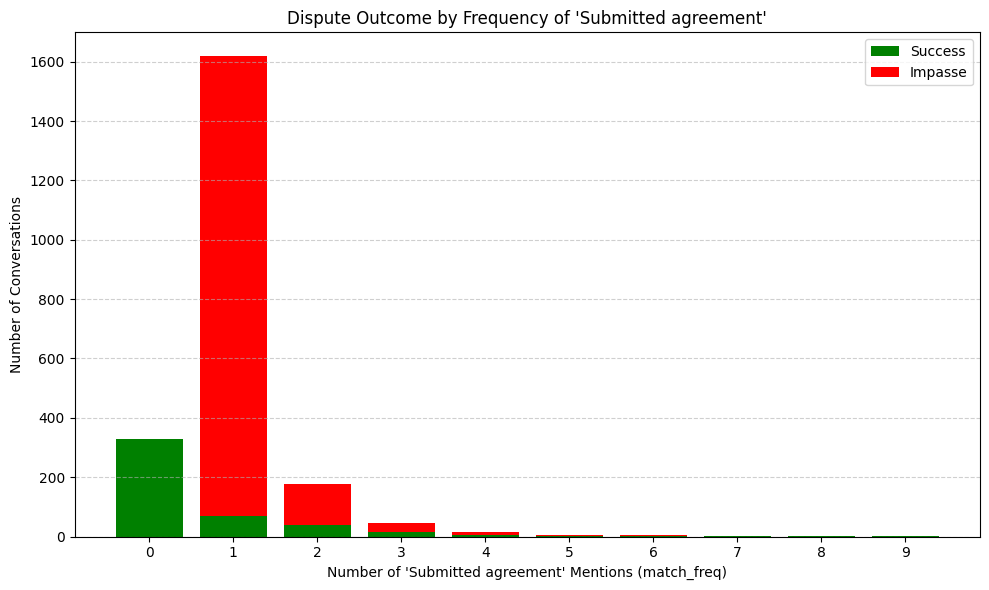

In [22]:
# Step 1: Get the two dataframes
out_df = data_preprocessor.getMatchedConvoDF("Submitted agreement", True)
match_df = data_preprocessor.text_matches_new["Submitted agreement"][1]

# Step 2: Add 'dispute_outcome' from out_df to match_df based on index
match_df = match_df.copy()
match_df["dispute_outcome"] = out_df["dispute_outcome"]

# Step 3: Drop rows where dispute_outcome is missing
match_df_clean = match_df.dropna(subset=["dispute_outcome"])

# Step 4: Convert to int for clarity
match_df_clean["dispute_outcome"] = match_df_clean["dispute_outcome"].astype(int)

# Step 5: Group by match_freq and count each outcome
outcome_counts = (
    match_df_clean.groupby("match_freq")["dispute_outcome"]
    .value_counts()
    .unstack(fill_value=0)
    .rename(columns={0: "Impasse", 1: "Success"})
    .reset_index()
)

import matplotlib.pyplot as plt

# Rename columns for cleaner labels
outcome_counts_renamed = outcome_counts.rename(columns={
    "Dispute Succeeded": "Success",
    "Dispute Failed": "Impasse"
})

# Plot
plt.figure(figsize=(10, 6))
plt.bar(outcome_counts_renamed["match_freq"], outcome_counts_renamed["Success"], label="Success", color="green")
plt.bar(
    outcome_counts_renamed["match_freq"],
    outcome_counts_renamed["Impasse"],
    bottom=outcome_counts_renamed["Success"],
    label="Impasse",
    color="red"
)

# Labels & styling
plt.xlabel("Number of 'Submitted agreement' Mentions (match_freq)")
plt.ylabel("Number of Conversations")
plt.title("Dispute Outcome by Frequency of 'Submitted agreement'")
plt.xticks(outcome_counts_renamed["match_freq"])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()



# Final Valid Success and Impasse Disputes

### **Getting Final DataFrames**
Made using "I Walk Away" Matched Conversations and " Accept Deal" in  last line of Dispute

In [23]:
'''For all dialoges, make sure that the last line is "Accept Deal or Walk away'''
final_success_df = data_preprocessor.getMatchedConvoDF("Accept Deal")
final_success_df  = final_success_df[final_success_df["parsed_dialog"].apply(lambda lst: lst[-1]['message'] == "Accept Deal")]
display(final_success_df)

final_reject_df = data_preprocessor.getMatchedConvoDF("I Walk Away")
final_reject_df  = final_reject_df[final_reject_df["parsed_dialog"].apply(lambda lst: "I Walk Away" in lst[-1]['message'])]
display(final_reject_df)

last_messages_reject = pd.DataFrame(final_reject_df["parsed_dialog"].apply(lambda lst: lst[-1]['message'] if isinstance(lst, list) and len(lst) > 0 else None))
display(last_messages_reject)

last_messages_accept = pd.DataFrame(final_success_df["parsed_dialog"].apply(lambda lst: lst[-1]['message'] if isinstance(lst, list) and len(lst) > 0 else None))
display(last_messages_accept)


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
6         187.0         50.0          8.0         30.0         12.0       2.0   
9         187.0         80.0          0.0         20.0          0.0       1.0   
10        187.0         40.0         30.0         20.0         10.0       2.0   
12        187.0         90.0          5.0          5.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2866      161.0         50.0         10.0         15.0         25.0       NaN   
2869      161.0         15.0         20.0         25.0         40.0       NaN   
2871      185.0         75.0          0.0         25.0          0.0       NaN   
2872      161.0         35.0         20.0         30.0         15.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
6          5.0       4.0       NaN       4.0  ...     NaN         NaN   
9          3.0       4.0       NaN       4.0  ...     NaN         NaN   
10         3.0       3.0       NaN       4.0  ...     NaN         NaN   
12         4.0       2.0       NaN       3.0  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2866       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2869       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2871       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2872       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   

                                            s_AI-cues.1  is_AI  \
1                                                   NaN  False   
6                                                   NaN  False   
9                                                   NaN  False   
10                                                  NaN  False   
12                                                  NaN  False   
...                                                 ...    ...   
2866  The conversation was emotions and had typing e...  False   
2869                     because he responded genuinely  False   
2871                                                NaN  False   
2872  sentences were short and minimal information g...  False   
2880  It souunded too good to be true yet so human a...  False   

                                          formattedChat  b_insight s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
6     1699389969 Buyer: Hello. I need you to make th...        2.0       6.0   
9     1699392080 Buyer: I would prefer a refund as t...        2.0       5.0   
10    1699392404 Buyer: I didn't receive the correct...        NaN       NaN   
12    1699393461 Buyer: Hello! I need you to refund ...        3.0       0.0   
...                                                 ...        ...       ...   
2866  1718874750 Buyer: My product arrived broken , ...        1.0       2.0   
2869  1718875387 Buyer: Hello i requesting for a par...        2.0       6.0   
2871  1718875699 Buyer: I would like a refund, the b...        NaN       NaN   
2872  1718876074 Buyer: Hey, I received my order and...        4.0       3.0   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   

                                          parsed_dialog flag_speaker  \
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
6     [{'timestamp': 1699389969, 'speaker': 'Buyer',...          3.0   
9     [{'timestamp': 1699392080, 'speaker': 'Buyer',...          1.0   
10    [{'timestamp': 1699392404, 'speaker': 'Buyer',...          3.0   
12    [{'timestamp': 1699393461, 'speaker'

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
0         187.0         80.0         12.0          5.0          3.0       1.0   
23          NaN         60.0         10.0         20.0         10.0       4.0   
46          NaN          NaN          NaN          NaN          NaN       NaN   
50          NaN          NaN          NaN          NaN          NaN       NaN   
58          NaN         75.0          0.0         25.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2844      161.0         70.0          0.0         10.0         20.0       NaN   
2853      161.0         60.0          0.0         20.0         20.0       NaN   
2859      185.0         40.0         20.0         30.0         10.0       NaN   
2861      161.0         50.0         30.0          0.0         20.0       NaN   
2870      137.0         90.0          0.0         10.0          0.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
0          4.0       5.0       NaN       1.0  ...     NaN         NaN   
23         5.0       5.0       5.0       2.0  ...     NaN         NaN   
46         NaN       NaN       NaN       NaN  ...     1.0         NaN   
50         NaN       NaN       NaN       NaN  ...     4.0         NaN   
58         4.0       4.0       1.0       5.0  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2844       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2853       NaN       NaN       NaN       NaN  ...     NaN         1.0   
2859       NaN       NaN       NaN       NaN  ...     NaN         2.0   
2861       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2870       NaN       NaN       NaN       NaN  ...     NaN         5.0   

                                            s_AI-cues.1  is_AI  \
0                                                   NaN   True   
23                                                  NaN   True   
46                                                  NaN   True   
50                                                  NaN   True   
58                                                  NaN  False   
...                                                 ...    ...   
2844                                                NaN  False   
2853                       the reposnse lacked emotions  False   
2859  Spelling was always on par and just felt robot...  False   
2861                                                NaN  False   
2870                                   how he responded  False   

                                          formattedChat  b_insight s_insight  \
0     nan Seller: Your sudden demand for a refund is...        NaN       NaN   
23    nan Seller: Your sudden demand for a refund is...        NaN       NaN   
46    nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
50    nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
58    1701300334 Buyer: I ordered this for a sick ch...        7.0       2.0   
...                                                 ...        ...       ...   
2844  1718875250 Seller: Hi I am sorry to hear that ...        5.0       2.0   
2853  1718874473 Buyer: Good day seller. I think you...        5.0      12.0   
2859  1718874176 Buyer: hey\n1718874183 Seller: Hi T...        5.0       3.0   
2861  1718874729 Buyer: I purchased a Kobe Bryant sh...        6.0       2.0   
2870  1718875522 Buyer: Hello, I would like to recei...        0.0       1.0   

                                          parsed_dialog flag_speaker  \
0     [{'timestamp': 'nan', 'speaker': 'Seller', 'me...          0.0   
23    [{'timestamp': 'nan', 'speaker': 'Seller', 'me...          0.0   
46    [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...          2.0   
50    [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...          2.0   
58    [{'timestamp': 1701300334, 'speaker'

parsed_dialog
0     I Walk Away.
23    I Walk Away.
46    I Walk Away.
50    I Walk Away.
58    I Walk Away.
...            ...
2844  I Walk Away.
2853  I Walk Away.
2859  I Walk Away.
2861  I Walk Away.
2870  I Walk Away.

[464 rows x 1 columns]

parsed_dialog
1      Accept Deal
6      Accept Deal
9      Accept Deal
10     Accept Deal
12     Accept Deal
...            ...
2866   Accept Deal
2869   Accept Deal
2871   Accept Deal
2872   Accept Deal
2880   Accept Deal

[1736 rows x 1 columns]

In [24]:
print("number of AI dialogues for Accepted Deals")
display(data_preprocessor.groupbyMatchUttStat('I Walk Away', 'speaker', ['relative_pos', 'is_AI'], ['mean', 'mean']))

number of AI dialogues for Accepted Deals
Key Value: I Walk Away, Grouped by: speaker, Aggregated columns: ['relative_pos', 'is_AI'], Aggregations: {'relative_pos': 'mean', 'is_AI': 'mean'}


mean_relative_pos mean_is_AI
speaker                              
Buyer              0.99743   0.013216
Seller             0.99770   0.004065

### **Identifying if buyer or seller ended the dispute**

flag_speaker
Seller - Accept Deal    918
Buyer - Accept Deal     818
Name: count, dtype: int64


flag_speaker
Seller - I Walk Away    240
Buyer - I Walk Away     224
Name: count, dtype: int64

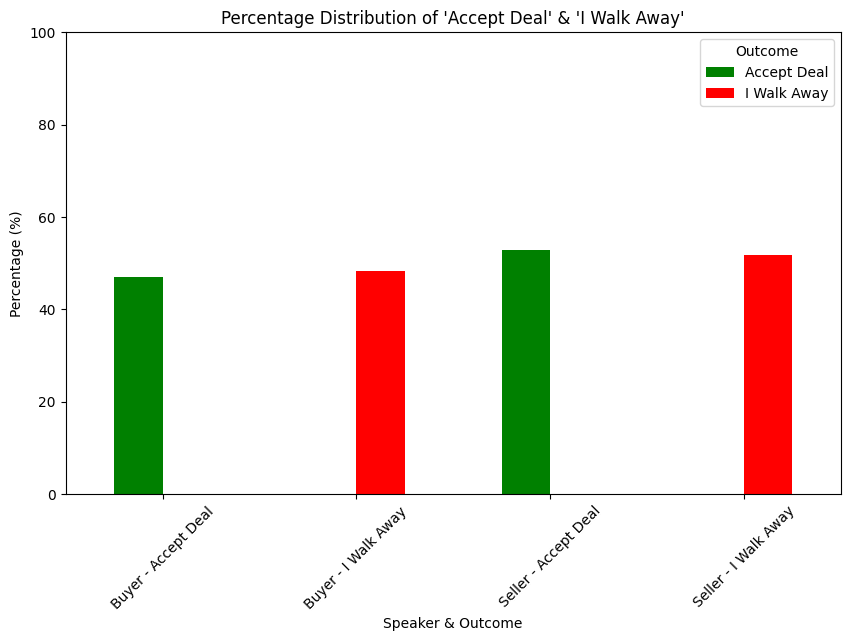

In [25]:
# Apply mapping to final_success_df_counts
flag_speaker_map = {
    0: "Buyer - I Walk Away",
    1: "Buyer - Accept Deal",
    2: "Seller - I Walk Away",
    3: "Seller - Accept Deal"
}


flag_speaker_counts_accept = final_success_df["flag_speaker"].value_counts()

flag_speaker_counts_reject = final_reject_df["flag_speaker"].value_counts()

flag_speaker_counts_accept.index = flag_speaker_counts_accept.index.map(flag_speaker_map)
print(flag_speaker_counts_accept)
# Apply mapping to final_reject_df_counts
flag_speaker_counts_reject.index = flag_speaker_counts_reject.index.map(flag_speaker_map)
display(flag_speaker_counts_reject)


import matplotlib.pyplot as plt
# Calculate total counts per outcome
total_accept_deals = flag_speaker_counts_accept.sum()  # 918 + 818
total_rejects = flag_speaker_counts_reject.sum()  # 240 + 224

# Convert to percentage within each category
accept_deals_percent = (flag_speaker_counts_accept / total_accept_deals) * 100
reject_deals_percent = (flag_speaker_counts_reject / total_rejects) * 100

# Combine both into a single DataFrame
flag_speaker_percentage = pd.DataFrame({
    "Accept Deal": accept_deals_percent,
    "I Walk Away": reject_deals_percent
}).fillna(0)  # Fill NaN values with 0

# Plot the percentage data
flag_speaker_percentage.plot(kind="bar", figsize=(10, 6), color=["green", "red"])

# Add labels and title
plt.xlabel("Speaker & Outcome")
plt.ylabel("Percentage (%)")
plt.title("Percentage Distribution of 'Accept Deal' & 'I Walk Away'")
plt.legend(title="Outcome")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.ylim(0, 100)  # Ensure y-axis is between 0 and 100%

# Show the plot
plt.show()


### **Total number of Accepted/Rejected Deals**


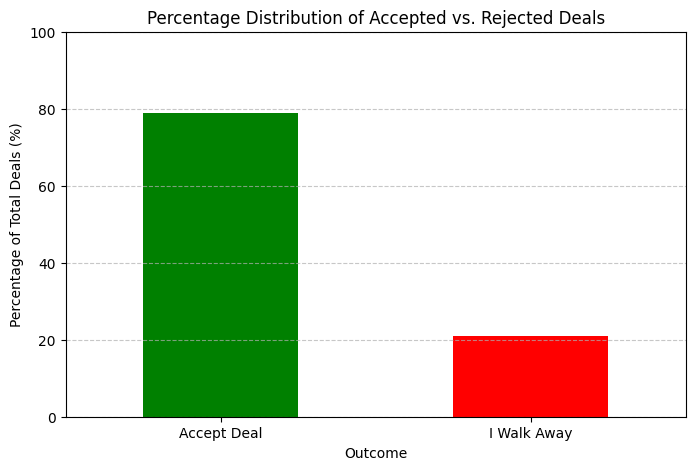

In [26]:
# Total counts for accepted and rejected deals
total_accept_deals = flag_speaker_counts_accept.sum()  # 918 + 818
total_rejects = flag_speaker_counts_reject.sum()  # 240 + 224
total_deals = total_accept_deals + total_rejects  # Total transactions

# Compute percentage of total deals
deal_outcomes_percentage = pd.Series({
    "Accept Deal": (total_accept_deals / total_deals) * 100,
    "I Walk Away": (total_rejects / total_deals) * 100
})

# Plot
deal_outcomes_percentage.plot(kind="bar", figsize=(8, 5), color=["green", "red"])

# Labels & title
plt.xlabel("Outcome")
plt.ylabel("Percentage of Total Deals (%)")
plt.title("Percentage Distribution of Accepted vs. Rejected Deals")
plt.ylim(0, 100)  # Ensure percentage scale
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add horizontal grid lines for clarity

# Show plot
plt.show()

# Corrected Labels from alldyads_labels.csv file

In [27]:
labels = pd.read_csv('/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/alldyads_labels.csv')
main_df = pd.read_csv('/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/alldyads.csv')
main_df = main_df.dropna(subset=["formattedChat"]).reset_index(drop=True)
main_df = main_df.merge(
    labels[["formattedChat", "b_final_result"]],
    on="formattedChat",
    how="inner"
)

main_df = main_df.dropna(subset=["b_final_result"])
main_df = main_df[main_df["is_AI"] != True]
# Create the "dispute_outcome" column: 1 if value is "Z", else 0
#"Z" is "impasse" -> 1 
main_df["dispute_outcome"] = main_df["b_final_result"].apply(lambda x: 1 if x == "Z" else 0)

#
display(main_df)
df1 = main_df

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
6         187.0         50.0          8.0         30.0         12.0       2.0   
9         187.0         80.0          0.0         20.0          0.0       1.0   
10        187.0         40.0         30.0         20.0         10.0       2.0   
12        187.0         90.0          5.0          5.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2868      161.0         15.0         20.0         25.0         40.0       NaN   
2869      137.0         90.0          0.0         10.0          0.0       NaN   
2870      185.0         75.0          0.0         25.0          0.0       NaN   
2871      161.0         35.0         20.0         30.0         15.0       NaN   
2879      185.0         60.0         10.0         25.0          5.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_Use emotions  s_AI4u  \
1          1.0       2.0       NaN       1.0  ...             NaN     NaN   
6          5.0       4.0       NaN       4.0  ...             NaN     NaN   
9          3.0       4.0       NaN       4.0  ...             NaN     NaN   
10         3.0       3.0       NaN       4.0  ...             NaN     NaN   
12         4.0       2.0       NaN       3.0  ...             NaN     NaN   
...        ...       ...       ...       ...  ...             ...     ...   
2868       NaN       NaN       NaN       NaN  ...             NaN     NaN   
2869       NaN       NaN       NaN       NaN  ...             NaN     NaN   
2870       NaN       NaN       NaN       NaN  ...             NaN     NaN   
2871       NaN       NaN       NaN       NaN  ...             NaN     NaN   
2879       NaN       NaN       NaN       NaN  ...             NaN     NaN   

      s_PlayAI.1                                        s_AI-cues.1  is_AI  \
1            NaN                                                NaN  False   
6            NaN                                                NaN  False   
9            NaN                                                NaN  False   
10           NaN                                                NaN  False   
12           NaN                                                NaN  False   
...          ...                                                ...    ...   
2868         5.0                     because he responded genuinely  False   
2869         5.0                                   how he responded  False   
2870         NaN                                                NaN  False   
2871         5.0  sentences were short and minimal information g...  False   
2879         2.0  It souunded too good to be true yet so human a...  False   

                                          formattedChat b_insight  s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...       3.0        1.0   
6     1699389969 Buyer: Hello. I need you to make th...       2.0        6.0   
9     1699392080 Buyer: I would prefer a refund as t...       2.0        5.0   
10    1699392404 Buyer: I didn't receive the correct...       NaN        NaN   
12    1699393461 Buyer: Hello! I need you to refund ...       3.0        0.0   
...                                                 ...       ...        ...   
2868  1718875387 Buyer: Hello i requesting for a par...       2.0        6.0   
2869  1718875522 Buyer: Hello, I would like to recei...       0.0        1.0   
2870  1718875699 Buyer: I would like a refund, the b...       NaN        NaN   
2871  1718876074 Buyer: Hey, I received my order and...       4.0        3.0   
2879  1718878682 Buyer: Hi there, thank you for send...       3.0        4.0   

     b_final_result  dispute_outcome  
1                 O                0  
6                 R                0  
9                 X                0  
10                W                0  
12             

# Save Final Valid Dataframe to CSV file

### **Setting Final dataframes**

In [28]:

data_preprocessor.filterValidOutcomes()
data_preprocessor.getDataframe()


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
6         187.0         50.0          8.0         30.0         12.0       2.0   
9         187.0         80.0          0.0         20.0          0.0       1.0   
10        187.0         40.0         30.0         20.0         10.0       2.0   
12        187.0         90.0          5.0          5.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2866      161.0         50.0         10.0         15.0         25.0       NaN   
2869      161.0         15.0         20.0         25.0         40.0       NaN   
2871      185.0         75.0          0.0         25.0          0.0       NaN   
2872      161.0         35.0         20.0         30.0         15.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
6          5.0       4.0       NaN       4.0  ...     NaN         NaN   
9          3.0       4.0       NaN       4.0  ...     NaN         NaN   
10         3.0       3.0       NaN       4.0  ...     NaN         NaN   
12         4.0       2.0       NaN       3.0  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2866       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2869       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2871       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2872       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   

                                            s_AI-cues.1  is_AI  \
1                                                   NaN  False   
6                                                   NaN  False   
9                                                   NaN  False   
10                                                  NaN  False   
12                                                  NaN  False   
...                                                 ...    ...   
2866  The conversation was emotions and had typing e...  False   
2869                     because he responded genuinely  False   
2871                                                NaN  False   
2872  sentences were short and minimal information g...  False   
2880  It souunded too good to be true yet so human a...  False   

                                          formattedChat  b_insight s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
6     1699389969 Buyer: Hello. I need you to make th...        2.0       6.0   
9     1699392080 Buyer: I would prefer a refund as t...        2.0       5.0   
10    1699392404 Buyer: I didn't receive the correct...        NaN       NaN   
12    1699393461 Buyer: Hello! I need you to refund ...        3.0       0.0   
...                                                 ...        ...       ...   
2866  1718874750 Buyer: My product arrived broken , ...        1.0       2.0   
2869  1718875387 Buyer: Hello i requesting for a par...        2.0       6.0   
2871  1718875699 Buyer: I would like a refund, the b...        NaN       NaN   
2872  1718876074 Buyer: Hey, I received my order and...        4.0       3.0   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   

                                          parsed_dialog flag_speaker  \
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
6     [{'timestamp': 1699389969, 'speaker': 'Buyer',...          3.0   
9     [{'timestamp': 1699392080, 'speaker': 'Buyer',...          1.0   
10    [{'timestamp': 1699392404, 'speaker': 'Buyer',...          3.0   
12    [{'timestamp': 1699393461, 'speaker'

Data type of parsed_dialog: <class 'list'>


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
6         187.0         50.0          8.0         30.0         12.0       2.0   
9         187.0         80.0          0.0         20.0          0.0       1.0   
10        187.0         40.0         30.0         20.0         10.0       2.0   
12        187.0         90.0          5.0          5.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2869      161.0         15.0         20.0         25.0         40.0       NaN   
2870      137.0         90.0          0.0         10.0          0.0       NaN   
2871      185.0         75.0          0.0         25.0          0.0       NaN   
2872      161.0         35.0         20.0         30.0         15.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
6          5.0       4.0       NaN       4.0  ...     NaN         NaN   
9          3.0       4.0       NaN       4.0  ...     NaN         NaN   
10         3.0       3.0       NaN       4.0  ...     NaN         NaN   
12         4.0       2.0       NaN       3.0  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2869       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2870       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2871       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2872       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   

                                            s_AI-cues.1  is_AI  \
1                                                   NaN  False   
6                                                   NaN  False   
9                                                   NaN  False   
10                                                  NaN  False   
12                                                  NaN  False   
...                                                 ...    ...   
2869                     because he responded genuinely  False   
2870                                   how he responded  False   
2871                                                NaN  False   
2872  sentences were short and minimal information g...  False   
2880  It souunded too good to be true yet so human a...  False   

                                          formattedChat  b_insight s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
6     1699389969 Buyer: Hello. I need you to make th...        2.0       6.0   
9     1699392080 Buyer: I would prefer a refund as t...        2.0       5.0   
10    1699392404 Buyer: I didn't receive the correct...        NaN       NaN   
12    1699393461 Buyer: Hello! I need you to refund ...        3.0       0.0   
...                                                 ...        ...       ...   
2869  1718875387 Buyer: Hello i requesting for a par...        2.0       6.0   
2870  1718875522 Buyer: Hello, I would like to recei...        0.0       1.0   
2871  1718875699 Buyer: I would like a refund, the b...        NaN       NaN   
2872  1718876074 Buyer: Hey, I received my order and...        4.0       3.0   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   

                                          parsed_dialog flag_speaker  \
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
6     [{'timestamp': 1699389969, 'speaker': 'Buyer',...          3.0   
9     [{'timestamp': 1699392080, 'speaker': 'Buyer',...          1.0   
10    [{'timestamp': 1699392404, 'speaker': 'Buyer',...          3.0   
12    [{'timestamp': 1699393461, 'speaker'

In [29]:
data_preprocessor.filterMatches('message', "I Walk Away")
data_preprocessor.filterMatches('message', "Accept Deal")
display(data_preprocessor.getMatchedConvoDF("I Walk Away", all = False))
display(data_preprocessor.getMatchedConvoDF("Accept Deal", all = False))

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
58          NaN         75.0          0.0         25.0          0.0       1.0   
62          NaN         80.0         10.0         10.0          0.0       2.0   
63          NaN         80.0          5.0          5.0         10.0       2.0   
73        187.0         30.0         15.0         15.0         40.0       1.0   
76        187.0         40.0         10.0         30.0         20.0       4.0   
...         ...          ...          ...          ...          ...       ...   
2844      161.0         70.0          0.0         10.0         20.0       NaN   
2853      161.0         60.0          0.0         20.0         20.0       NaN   
2859      185.0         40.0         20.0         30.0         10.0       NaN   
2861      161.0         50.0         30.0          0.0         20.0       NaN   
2870      137.0         90.0          0.0         10.0          0.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
58         4.0       4.0       1.0       5.0  ...     NaN         NaN   
62         2.0       5.0       3.0       1.0  ...     NaN         NaN   
63         4.0       5.0       5.0       4.0  ...     NaN         NaN   
73         4.0       4.0       2.0       2.0  ...     NaN         5.0   
76         3.0       4.0       5.0       4.0  ...     NaN         4.0   
...        ...       ...       ...       ...  ...     ...         ...   
2844       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2853       NaN       NaN       NaN       NaN  ...     NaN         1.0   
2859       NaN       NaN       NaN       NaN  ...     NaN         2.0   
2861       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2870       NaN       NaN       NaN       NaN  ...     NaN         5.0   

                                            s_AI-cues.1  is_AI  \
58                                                  NaN  False   
62                                                  NaN  False   
63                                                  NaN  False   
73                                                  NaN  False   
76                                                  NaN  False   
...                                                 ...    ...   
2844                                                NaN  False   
2853                       the reposnse lacked emotions  False   
2859  Spelling was always on par and just felt robot...  False   
2861                                                NaN  False   
2870                                   how he responded  False   

                                          formattedChat  b_insight s_insight  \
58    1701300334 Buyer: I ordered this for a sick ch...        7.0       2.0   
62    1701301260 Buyer: I would like a full refund s...       17.0       1.0   
63    1701301154 Buyer: I'd like to request a refund...       12.0       1.0   
73    1701385463 Buyer: I would like a full refund b...        7.0       7.0   
76    1701384049 Buyer: good day , my item received ...       10.0       5.0   
...                                                 ...        ...       ...   
2844  1718875250 Seller: Hi I am sorry to hear that ...        5.0       2.0   
2853  1718874473 Buyer: Good day seller. I think you...        5.0      12.0   
2859  1718874176 Buyer: hey\n1718874183 Seller: Hi T...        5.0       3.0   
2861  1718874729 Buyer: I purchased a Kobe Bryant sh...        6.0       2.0   
2870  1718875522 Buyer: Hello, I would like to recei...        0.0       1.0   

                                          parsed_dialog flag_speaker  \
58    [{'timestamp': 1701300334, 'speaker': 'Buyer',...          0.0   
62    [{'timestamp': 1701301260, 'speaker': 'Buyer',...          0.0   
63    [{'timestamp': 1701301154, 'speaker': 'Buyer',...          0.0   
73    [{'timestamp': 1701385463, 'speaker': 'Buyer',...          0.0   
76    [{'timestamp': 1701384049, 'speaker'

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
6         187.0         50.0          8.0         30.0         12.0       2.0   
9         187.0         80.0          0.0         20.0          0.0       1.0   
10        187.0         40.0         30.0         20.0         10.0       2.0   
12        187.0         90.0          5.0          5.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2866      161.0         50.0         10.0         15.0         25.0       NaN   
2869      161.0         15.0         20.0         25.0         40.0       NaN   
2871      185.0         75.0          0.0         25.0          0.0       NaN   
2872      161.0         35.0         20.0         30.0         15.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
6          5.0       4.0       NaN       4.0  ...     NaN         NaN   
9          3.0       4.0       NaN       4.0  ...     NaN         NaN   
10         3.0       3.0       NaN       4.0  ...     NaN         NaN   
12         4.0       2.0       NaN       3.0  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2866       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2869       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2871       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2872       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   

                                            s_AI-cues.1  is_AI  \
1                                                   NaN  False   
6                                                   NaN  False   
9                                                   NaN  False   
10                                                  NaN  False   
12                                                  NaN  False   
...                                                 ...    ...   
2866  The conversation was emotions and had typing e...  False   
2869                     because he responded genuinely  False   
2871                                                NaN  False   
2872  sentences were short and minimal information g...  False   
2880  It souunded too good to be true yet so human a...  False   

                                          formattedChat  b_insight s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
6     1699389969 Buyer: Hello. I need you to make th...        2.0       6.0   
9     1699392080 Buyer: I would prefer a refund as t...        2.0       5.0   
10    1699392404 Buyer: I didn't receive the correct...        NaN       NaN   
12    1699393461 Buyer: Hello! I need you to refund ...        3.0       0.0   
...                                                 ...        ...       ...   
2866  1718874750 Buyer: My product arrived broken , ...        1.0       2.0   
2869  1718875387 Buyer: Hello i requesting for a par...        2.0       6.0   
2871  1718875699 Buyer: I would like a refund, the b...        NaN       NaN   
2872  1718876074 Buyer: Hey, I received my order and...        4.0       3.0   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   

                                          parsed_dialog flag_speaker  \
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
6     [{'timestamp': 1699389969, 'speaker': 'Buyer',...          3.0   
9     [{'timestamp': 1699392080, 'speaker': 'Buyer',...          1.0   
10    [{'timestamp': 1699392404, 'speaker': 'Buyer',...          3.0   
12    [{'timestamp': 1699393461, 'speaker'

### Filtering out Last Utterances and Submit Agreement

In [30]:
# conversation‐level DataFrame
import copy
dp_last= copy.deepcopy(data_preprocessor) 
dp_last_submit = copy.deepcopy(data_preprocessor) 
display(data_preprocessor.getUtterancesDF())  # or dp.df

# 1) Copy and drop only the last utterance from each parsed_dialog
df_no_last = dp_last.getDataframe()
df_no_last['parsed_dialog'] = (
    df_no_last['parsed_dialog']
    .apply(lambda dlg: dlg[:-1] if isinstance(dlg, list) and len(dlg)>0 else dlg)
)
dp_no_last = dp_last.getDataframe()[dp_last.getDataframe()["is_AI"] != True]
display(df_no_last)


# 2) Copy that one again, and also remove any utterance whose 'message' contains "Submitted agreement"
df_no_submit_and_last = df_no_last.copy(deep=True)
df_no_submit_and_last['parsed_dialog'] = (
    df_no_submit_and_last['parsed_dialog']
    .apply(lambda dlg: [utt for utt in dlg
                        if 'Submitted agreement' not in utt.get('message','')])
)

df_no_submit_and_last = df_no_submit_and_last[df_no_submit_and_last["is_AI"] != True]
display(df_no_submit_and_last)

dp_last_submit.setDataframe(df_no_submit_and_last)
dp_last.setDataframe(df_no_last)

# def saveToCSV(df, final_filepath, drop_parsed):
#         os.makedirs(os.path.dirname(final_filepath), exist_ok=True)
#         if drop_parsed:
#             df.drop(columns=['parsed_dialog'], inplace =True)
#         df.to_csv(final_filepath, index= True, index_label="Row_Index")
#         print(f"Data saved to {final_filepath}")

# 3) (Optionally) save each to disk
filepath_nolast = '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convos_exclude_last_utt.csv'
filepath_nolastsubmit = '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convos_exclude_submit_and_last.csv'

dp_last.saveToCSV(filepath_nolast, drop_parsed = False)
dp_last_submit.saveToCSV(filepath_nolastsubmit, drop_parsed = False)


timestamp speaker                                            message  \
0             nan  Seller  Your sudden demand for a refund is unwarranted...   
1      1699388150   Buyer  This was not the item I ordered, please provid...   
2      1699388170  Seller  How about a compromise? I can offer you a part...   
3      1699388217   Buyer  No, this was not the item I ordered. I have a ...   
4      1699388235  Seller  I can scrutinize your claim, but this requires...   
...           ...     ...                                                ...   
39841  1718879890   Buyer  Thank you I appreciate that.  I shall remove m...   
39842  1718879909  Seller  Deal. Once I see changes on your end, I'll ini...   
39843  1718879998   Buyer  I understand - please do follow through.  I ha...   
39844  1718880018  Seller  You have my word, I will follow through. A sna...   
39845  1718880039   Buyer  Submitted agreement: Buyer gets full refund, b...   

       uttidx   speaker_id  is_AI  row_idx  match_idx Case Match Type  \
0           0     Seller_0   True        0      False             NaN   
1           1      Buyer_0  False        0      False             NaN   
2           2     Seller_0   True        0      False             NaN   
3           3      Buyer_0  False        0      False             NaN   
4           4     Seller_0   True        0      False             NaN   
...       ...          ...    ...      ...        ...             ...   
39841       5   Buyer_2881  False     2881      False             NaN   
39842       6  Seller_2881   True     2881      False             NaN   
39843       7   Buyer_2881  False     2881      False             NaN   
39844       8  Seller_2881   True     2881      False             NaN   
39845       9   Buyer_2881  False     2881      False             NaN   

       convo_len  
0             16  
1             16  
2             16  
3             16  
4             16  
...          ...  
39841         10  
39842         10  
39843         10  
39844         10  
39845         10  

[39846 rows x 10 columns]

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
6         187.0         50.0          8.0         30.0         12.0       2.0   
9         187.0         80.0          0.0         20.0          0.0       1.0   
10        187.0         40.0         30.0         20.0         10.0       2.0   
12        187.0         90.0          5.0          5.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2869      161.0         15.0         20.0         25.0         40.0       NaN   
2870      137.0         90.0          0.0         10.0          0.0       NaN   
2871      185.0         75.0          0.0         25.0          0.0       NaN   
2872      161.0         35.0         20.0         30.0         15.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
6          5.0       4.0       NaN       4.0  ...     NaN         NaN   
9          3.0       4.0       NaN       4.0  ...     NaN         NaN   
10         3.0       3.0       NaN       4.0  ...     NaN         NaN   
12         4.0       2.0       NaN       3.0  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2869       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2870       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2871       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2872       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   

                                            s_AI-cues.1  is_AI  \
1                                                   NaN  False   
6                                                   NaN  False   
9                                                   NaN  False   
10                                                  NaN  False   
12                                                  NaN  False   
...                                                 ...    ...   
2869                     because he responded genuinely  False   
2870                                   how he responded  False   
2871                                                NaN  False   
2872  sentences were short and minimal information g...  False   
2880  It souunded too good to be true yet so human a...  False   

                                          formattedChat  b_insight s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
6     1699389969 Buyer: Hello. I need you to make th...        2.0       6.0   
9     1699392080 Buyer: I would prefer a refund as t...        2.0       5.0   
10    1699392404 Buyer: I didn't receive the correct...        NaN       NaN   
12    1699393461 Buyer: Hello! I need you to refund ...        3.0       0.0   
...                                                 ...        ...       ...   
2869  1718875387 Buyer: Hello i requesting for a par...        2.0       6.0   
2870  1718875522 Buyer: Hello, I would like to recei...        0.0       1.0   
2871  1718875699 Buyer: I would like a refund, the b...        NaN       NaN   
2872  1718876074 Buyer: Hey, I received my order and...        4.0       3.0   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   

                                          parsed_dialog flag_speaker  \
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
6     [{'timestamp': 1699389969, 'speaker': 'Buyer',...          3.0   
9     [{'timestamp': 1699392080, 'speaker': 'Buyer',...          1.0   
10    [{'timestamp': 1699392404, 'speaker': 'Buyer',...          3.0   
12    [{'timestamp': 1699393461, 'speaker'

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
6         187.0         50.0          8.0         30.0         12.0       2.0   
9         187.0         80.0          0.0         20.0          0.0       1.0   
10        187.0         40.0         30.0         20.0         10.0       2.0   
12        187.0         90.0          5.0          5.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2869      161.0         15.0         20.0         25.0         40.0       NaN   
2870      137.0         90.0          0.0         10.0          0.0       NaN   
2871      185.0         75.0          0.0         25.0          0.0       NaN   
2872      161.0         35.0         20.0         30.0         15.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
6          5.0       4.0       NaN       4.0  ...     NaN         NaN   
9          3.0       4.0       NaN       4.0  ...     NaN         NaN   
10         3.0       3.0       NaN       4.0  ...     NaN         NaN   
12         4.0       2.0       NaN       3.0  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2869       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2870       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2871       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2872       NaN       NaN       NaN       NaN  ...     NaN         5.0   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   

                                            s_AI-cues.1  is_AI  \
1                                                   NaN  False   
6                                                   NaN  False   
9                                                   NaN  False   
10                                                  NaN  False   
12                                                  NaN  False   
...                                                 ...    ...   
2869                     because he responded genuinely  False   
2870                                   how he responded  False   
2871                                                NaN  False   
2872  sentences were short and minimal information g...  False   
2880  It souunded too good to be true yet so human a...  False   

                                          formattedChat  b_insight s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
6     1699389969 Buyer: Hello. I need you to make th...        2.0       6.0   
9     1699392080 Buyer: I would prefer a refund as t...        2.0       5.0   
10    1699392404 Buyer: I didn't receive the correct...        NaN       NaN   
12    1699393461 Buyer: Hello! I need you to refund ...        3.0       0.0   
...                                                 ...        ...       ...   
2869  1718875387 Buyer: Hello i requesting for a par...        2.0       6.0   
2870  1718875522 Buyer: Hello, I would like to recei...        0.0       1.0   
2871  1718875699 Buyer: I would like a refund, the b...        NaN       NaN   
2872  1718876074 Buyer: Hey, I received my order and...        4.0       3.0   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   

                                          parsed_dialog flag_speaker  \
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
6     [{'timestamp': 1699389969, 'speaker': 'Buyer',...          3.0   
9     [{'timestamp': 1699392080, 'speaker': 'Buyer',...          1.0   
10    [{'timestamp': 1699392404, 'speaker': 'Buyer',...          3.0   
12    [{'timestamp': 1699393461, 'speaker'

Data saved to /Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convos_exclude_last_utt.csv
Data saved to /Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convos_exclude_submit_and_last.csv


### Utterances Dataframe example

In [31]:
data_preprocessor.getUtterancesDF()
[{'timestamp': 1699388451, 'speaker': 'Buyer', 'message': 'Hi there! I believe I received the wrong jersey from you! I was wondering if I could get a refund on my purchase?', 'uttidx': 0, 'speaker_id': 'Buyer_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699388553, 'speaker': 'Seller', 'message': "Good afternoon! I looked over your purchase record, and I'm afraid it looks like you bought the right item--it's advertised as a generic jersey, not one for a specific player. Given that, I'm afraid I can't issue you a refund. I'm sorry for the inconvenience!", 'uttidx': 1, 'speaker_id': 'Seller_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699388719, 'speaker': 'Buyer', 'message': 'I appreciate your timely response! I can understand how there is confusion. There were two options on the site. One for the generic jersey and a couple of specific jerseys. I had chosen the very specific one for my nephew and I think maybe I was shipped the incorrect order unfortunately! Is there anyway we could do a partial refund for me today?', 'uttidx': 2, 'speaker_id': 'Buyer_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699388896, 'speaker': 'Seller', 'message': "Of course! We try to reach all our customers as quickly as we can. I'd be more than happy to get the correct item to you--how about we spit the difference? If you can return the generic jersey, I'll get the correct one shipped to you. While were talking, I was hoping we could talk about the negative review you left on my business--as you can imagine, that can be very damaging. Could I convince you to retract that review?", 'uttidx': 3, 'speaker_id': 'Seller_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389108, 'speaker': 'Buyer', 'message': 'I can return the generic jersey, no problem! I wrote a bad review on your site because you wrote a bad review of me. I apologize. I will retract my review of me if can you remove your negative review on mine and if you apologize. How does that sound?', 'uttidx': 4, 'speaker_id': 'Buyer_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389202, 'speaker': 'Seller', 'message': "You know, that's a good idea. You seem really reasonable--how about we retract both negative reviews, each write an apology giving someone who stumbles by the review the full context, and we get the correct jerseys to each other?", 'uttidx': 5, 'speaker_id': 'Seller_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389315, 'speaker': 'Buyer', 'message': 'This seems very reasonable to me. I think at the end of the day we both just want a positive out come out of this so I am very happy with this result and I really appreciate you working with me on this.', 'uttidx': 6, 'speaker_id': 'Buyer_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389355, 'speaker': 'Seller', 'message': "Agreed! I'm grateful for your time. Hope you have a great rest of your day!", 'uttidx': 7, 'speaker_id': 'Seller_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389381, 'speaker': 'Buyer', 'message': 'I believe theres a few things left to say!!', 'uttidx': 8, 'speaker_id': 'Buyer_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389423, 'speaker': 'Seller', 'message': 'Oh? I beg your pardon. What can I do for you?', 'uttidx': 9, 'speaker_id': 'Seller_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389451, 'speaker': 'Buyer', 'message': 'I was just going to say have a great rest of your day!', 'uttidx': 10, 'speaker_id': 'Buyer_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389479, 'speaker': 'Seller', 'message': 'Thank you, you too!', 'uttidx': 11, 'speaker_id': 'Seller_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}, {'timestamp': 1699389486, 'speaker': 'Buyer', 'message': 'Submitted agreement: Buyer gets partial refund, buyer retracted their review, seller retracted their review, buyer did apologize, and seller did apologize.', 'uttidx': 12, 'speaker_id': 'Buyer_1', 'is_AI': False, 'row_idx': 1, 'match_idx': False, 'Case Match Type': None}]

[{'timestamp': 1699388451,
  'speaker': 'Buyer',
  'message': 'Hi there! I believe I received the wrong jersey from you! I was wondering if I could get a refund on my purchase?',
  'uttidx': 0,
  'speaker_id': 'Buyer_1',
  'is_AI': False,
  'row_idx': 1,
  'match_idx': False,
  'Case Match Type': None},
 {'timestamp': 1699388553,
  'speaker': 'Seller',
  'message': "Good afternoon! I looked over your purchase record, and I'm afraid it looks like you bought the right item--it's advertised as a generic jersey, not one for a specific player. Given that, I'm afraid I can't issue you a refund. I'm sorry for the inconvenience!",
  'uttidx': 1,
  'speaker_id': 'Seller_1',
  'is_AI': False,
  'row_idx': 1,
  'match_idx': False,
  'Case Match Type': None},
 {'timestamp': 1699388719,
  'speaker': 'Buyer',
  'message': 'I appreciate your timely response! I can understand how there is confusion. There were two options on the site. One for the generic jersey and a couple of specific jerseys. I had 

In [32]:
# Ensure the folder exists before saving
# Save DataFrame to CSV
data_preprocessor.saveToCSV(final_filepath)

Data saved to /Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/preprocessed_dyads.csv


In [33]:
test = DataPreprocesser(final_filepath)
display(test.getDataframe())

Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  \
Row_Index                                                                  
1              187.0         40.0         10.0         31.0         19.0   
6              187.0         50.0          8.0         30.0         12.0   
9              187.0         80.0          0.0         20.0          0.0   
10             187.0         40.0         30.0         20.0         10.0   
12             187.0         90.0          5.0          5.0          0.0   
...              ...          ...          ...          ...          ...   
2869           161.0         15.0         20.0         25.0         40.0   
2870           137.0         90.0          0.0         10.0          0.0   
2871           185.0         75.0          0.0         25.0          0.0   
2872           161.0         35.0         20.0         30.0         15.0   
2880           185.0         60.0         10.0         25.0          5.0   

           b_Tact_1  b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  \
Row_Index                                                    ...           
1               3.0       1.0       2.0       NaN       1.0  ...     NaN   
6               2.0       5.0       4.0       NaN       4.0  ...     NaN   
9               1.0       3.0       4.0       NaN       4.0  ...     NaN   
10              2.0       3.0       3.0       NaN       4.0  ...     NaN   
12              1.0       4.0       2.0       NaN       3.0  ...     NaN   
...             ...       ...       ...       ...       ...  ...     ...   
2869            NaN       NaN       NaN       NaN       NaN  ...     NaN   
2870            NaN       NaN       NaN       NaN       NaN  ...     NaN   
2871            NaN       NaN       NaN       NaN       NaN  ...     NaN   
2872            NaN       NaN       NaN       NaN       NaN  ...     NaN   
2880            NaN       NaN       NaN       NaN       NaN  ...     NaN   

           s_PlayAI.1                                        s_AI-cues.1  \
Row_Index                                                                  
1                 NaN                                                NaN   
6                 NaN                                                NaN   
9                 NaN                                                NaN   
10                NaN                                                NaN   
12                NaN                                                NaN   
...               ...                                                ...   
2869              5.0                     because he responded genuinely   
2870              5.0                                   how he responded   
2871              NaN                                                NaN   
2872              5.0  sentences were short and minimal information g...   
2880              2.0  It souunded too good to be true yet so human a...   

           is_AI                                      formattedChat  \
Row_Index                                                             
1          False  1699388451 Buyer: Hi there! I believe I receiv...   
6          False  1699389969 Buyer: Hello. I need you to make th...   
9          False  1699392080 Buyer: I would prefer a refund as t...   
10         False  1699392404 Buyer: I didn't receive the correct...   
12         False  1699393461 Buyer: Hello! I need you to refund ...   
...          ...                                                ...   
2869       False  1718875387 Buyer: Hello i requesting for a par...   
2870       False  1718875522 Buyer: Hello, I would like to recei...   
2871       False  1718875699 Buyer: I would like a refund, the b...   
2872       False  1718876074 Buyer: Hey, I received my order and...   
2880       False  1718878682 Buyer: Hi there, thank you for send...   

           b_insight s_insight  \
Row_Index                        
1                3.0       1.0   
6                2

# Save Final Dataframe based on "b_final_results" Labels



In [34]:
label_path = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/alldyads_labels.csv"
filepath = '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/alldyads.csv'
df2 = DataPreprocesser(filepath, label_path= label_path)

display(df2.getDataframe())

test = DataPreprocesser(filepath)
display(test.getDataframe())
final_path = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/preprocessed_dyads_labels.csv"
df2.saveToCSV(final_path, drop_parsed= True)

2882


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
1         187.0         40.0         10.0         31.0         19.0       3.0   
6         187.0         50.0          8.0         30.0         12.0       2.0   
9         187.0         80.0          0.0         20.0          0.0       1.0   
10        187.0         40.0         30.0         20.0         10.0       2.0   
12        187.0         90.0          5.0          5.0          0.0       1.0   
...         ...          ...          ...          ...          ...       ...   
2868      161.0         15.0         20.0         25.0         40.0       NaN   
2869      137.0         90.0          0.0         10.0          0.0       NaN   
2870      185.0         75.0          0.0         25.0          0.0       NaN   
2871      161.0         35.0         20.0         30.0         15.0       NaN   
2879      185.0         60.0         10.0         25.0          5.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  \
1          1.0       2.0       NaN       1.0  ...   
6          5.0       4.0       NaN       4.0  ...   
9          3.0       4.0       NaN       4.0  ...   
10         3.0       3.0       NaN       4.0  ...   
12         4.0       2.0       NaN       3.0  ...   
...        ...       ...       ...       ...  ...   
2868       NaN       NaN       NaN       NaN  ...   
2869       NaN       NaN       NaN       NaN  ...   
2870       NaN       NaN       NaN       NaN  ...   
2871       NaN       NaN       NaN       NaN  ...   
2879       NaN       NaN       NaN       NaN  ...   

                                            s_AI-cues.1  is_AI  \
1                                                   NaN  False   
6                                                   NaN  False   
9                                                   NaN  False   
10                                                  NaN  False   
12                                                  NaN  False   
...                                                 ...    ...   
2868                     because he responded genuinely  False   
2869                                   how he responded  False   
2870                                                NaN  False   
2871  sentences were short and minimal information g...  False   
2879  It souunded too good to be true yet so human a...  False   

                                          formattedChat  b_insight  s_insight  \
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0        1.0   
6     1699389969 Buyer: Hello. I need you to make th...        2.0        6.0   
9     1699392080 Buyer: I would prefer a refund as t...        2.0        5.0   
10    1699392404 Buyer: I didn't receive the correct...        NaN        NaN   
12    1699393461 Buyer: Hello! I need you to refund ...        3.0        0.0   
...                                                 ...        ...        ...   
2868  1718875387 Buyer: Hello i requesting for a par...        2.0        6.0   
2869  1718875522 Buyer: Hello, I would like to recei...        0.0        1.0   
2870  1718875699 Buyer: I would like a refund, the b...        NaN        NaN   
2871  1718876074 Buyer: Hey, I received my order and...        4.0        3.0   
2879  1718878682 Buyer: Hi there, thank you for send...        3.0        4.0   

                                          parsed_dialog flag_speaker  \
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
6     [{'timestamp': 1699389969, 'speaker': 'Buyer',...          3.0   
9     [{'timestamp': 1699392080, 'speaker': 'Buyer',...          1.0   
10    [{'timestamp': 1699392404, 'speaker': 'Buyer',...          3.0   
12    [{'timestamp': 1699393461, 'speaker': 'Buyer',...          1.0   
...                                                 ...          ...   
2868  [{'timestamp': 1718875387, 'speaker': 'Buyer',...          3.0   
2869  [{'timestamp': 1718875522, 'speaker': 'Buyer',..

2882


b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  b_Tact_1  \
0         187.0         80.0         12.0          5.0          3.0       1.0   
1         187.0         40.0         10.0         31.0         19.0       3.0   
2         187.0         40.0         10.0         30.0         20.0       2.0   
3           NaN          NaN          NaN          NaN          NaN       NaN   
4           NaN          NaN          NaN          NaN          NaN       NaN   
...         ...          ...          ...          ...          ...       ...   
2877      161.0         50.0         10.0         20.0         20.0       NaN   
2878      185.0         60.0         10.0         30.0          0.0       NaN   
2879      185.0         50.0         10.0         30.0         10.0       NaN   
2880      185.0         60.0         10.0         25.0          5.0       NaN   
2881      185.0         40.0         20.0         30.0         10.0       NaN   

      b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  s_PlayAI.1  \
0          4.0       5.0       NaN       1.0  ...     NaN         NaN   
1          1.0       2.0       NaN       1.0  ...     NaN         NaN   
2          4.0       4.0       NaN       3.0  ...     NaN         NaN   
3          NaN       NaN       NaN       NaN  ...     NaN         NaN   
4          NaN       NaN       NaN       NaN  ...     NaN         NaN   
...        ...       ...       ...       ...  ...     ...         ...   
2877       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2878       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2879       NaN       NaN       NaN       NaN  ...     NaN         NaN   
2880       NaN       NaN       NaN       NaN  ...     NaN         2.0   
2881       NaN       NaN       NaN       NaN  ...     NaN         NaN   

                                            s_AI-cues.1  is_AI  \
0                                                   NaN   True   
1                                                   NaN  False   
2                                                   NaN   True   
3                                                   NaN   True   
4                                                   NaN   True   
...                                                 ...    ...   
2877                                                NaN   True   
2878                                                NaN   True   
2879                                                NaN   True   
2880  It souunded too good to be true yet so human a...  False   
2881                                                NaN   True   

                                          formattedChat  b_insight s_insight  \
0     nan Seller: Your sudden demand for a refund is...        NaN       NaN   
1     1699388451 Buyer: Hi there! I believe I receiv...        3.0       1.0   
2     nan Seller: Your sudden demand for a refund is...        NaN       NaN   
3     nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
4     nan Buyer: Your response is utterly unacceptab...        NaN       NaN   
...                                                 ...        ...       ...   
2877  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2878  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2879  nan Seller: Your sudden demand for a refund is...        NaN       NaN   
2880  1718878682 Buyer: Hi there, thank you for send...        3.0       4.0   
2881  nan Seller: Your sudden demand for a refund is...        NaN       NaN   

                                          parsed_dialog flag_speaker  \
0     [{'timestamp': 'nan', 'speaker': 'Seller', 'me...          0.0   
1     [{'timestamp': 1699388451, 'speaker': 'Buyer',...          3.0   
2     [{'timestamp': 'nan', 'speaker': 'Seller', 'me...          NaN   
3     [{'timestamp': 'nan', 'speaker': 'Buyer', 'mes...          NaN   
4     [{'timestamp': 'nan', 'speaker': 'Bu

Data saved to /Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/preprocessed_dyads_labels.csv


### Checking if custom filtered matched provided columns

In [35]:
df1 = data_preprocessor.getDataframe()
df2= df2.getDataframe()
on_columns = list(set(df1.columns) & set(df2.columns))

# Drop duplicates to avoid false mismatches if needed
df1_clean = df1[on_columns].drop_duplicates().copy()
df2_clean = df2[on_columns].drop_duplicates().copy()

# Find rows in df1 not in df2
only_in_df1 = df1_clean.merge(df2_clean, on=on_columns, how='left', indicator=True)
only_in_df1 = only_in_df1[only_in_df1['_merge'] == 'left_only']
only_in_df1 = df1[df1[on_columns].apply(tuple, axis=1).isin(only_in_df1[on_columns].apply(tuple, axis=1))]

# Find rows in df2 not in df1
only_in_df2 = df2_clean.merge(df1_clean, on=on_columns, how='left', indicator=True)
only_in_df2 = only_in_df2[only_in_df2['_merge'] == 'left_only']
only_in_df2 = df2[df2[on_columns].apply(tuple, axis=1).isin(only_in_df2[on_columns].apply(tuple, axis=1))]


### Checking UtteranceDF from filtered conversations

In [36]:

last_df = DataPreprocesser(filepath_nolast)
submit_last_df = DataPreprocesser(filepath_nolastsubmit)



Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'


Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'


In [37]:
last_df.getDataframe()

b_country  b_RankBuy_1  b_RankBuy_2  b_RankBuy_3  b_RankBuy_4  \
Row_Index                                                                  
1              187.0         40.0         10.0         31.0         19.0   
6              187.0         50.0          8.0         30.0         12.0   
9              187.0         80.0          0.0         20.0          0.0   
10             187.0         40.0         30.0         20.0         10.0   
12             187.0         90.0          5.0          5.0          0.0   
...              ...          ...          ...          ...          ...   
2869           161.0         15.0         20.0         25.0         40.0   
2870           137.0         90.0          0.0         10.0          0.0   
2871           185.0         75.0          0.0         25.0          0.0   
2872           161.0         35.0         20.0         30.0         15.0   
2880           185.0         60.0         10.0         25.0          5.0   

           b_Tact_1  b_Tact_2  b_Tact_3  b_Tact_4  b_Tact_5  ...  s_AI4u  \
Row_Index                                                    ...           
1               3.0       1.0       2.0       NaN       1.0  ...     NaN   
6               2.0       5.0       4.0       NaN       4.0  ...     NaN   
9               1.0       3.0       4.0       NaN       4.0  ...     NaN   
10              2.0       3.0       3.0       NaN       4.0  ...     NaN   
12              1.0       4.0       2.0       NaN       3.0  ...     NaN   
...             ...       ...       ...       ...       ...  ...     ...   
2869            NaN       NaN       NaN       NaN       NaN  ...     NaN   
2870            NaN       NaN       NaN       NaN       NaN  ...     NaN   
2871            NaN       NaN       NaN       NaN       NaN  ...     NaN   
2872            NaN       NaN       NaN       NaN       NaN  ...     NaN   
2880            NaN       NaN       NaN       NaN       NaN  ...     NaN   

           s_PlayAI.1                                        s_AI-cues.1  \
Row_Index                                                                  
1                 NaN                                                NaN   
6                 NaN                                                NaN   
9                 NaN                                                NaN   
10                NaN                                                NaN   
12                NaN                                                NaN   
...               ...                                                ...   
2869              5.0                     because he responded genuinely   
2870              5.0                                   how he responded   
2871              NaN                                                NaN   
2872              5.0  sentences were short and minimal information g...   
2880              2.0  It souunded too good to be true yet so human a...   

           is_AI                                      formattedChat  \
Row_Index                                                             
1          False  1699388451 Buyer: Hi there! I believe I receiv...   
6          False  1699389969 Buyer: Hello. I need you to make th...   
9          False  1699392080 Buyer: I would prefer a refund as t...   
10         False  1699392404 Buyer: I didn't receive the correct...   
12         False  1699393461 Buyer: Hello! I need you to refund ...   
...          ...                                                ...   
2869       False  1718875387 Buyer: Hello i requesting for a par...   
2870       False  1718875522 Buyer: Hello, I would like to recei...   
2871       False  1718875699 Buyer: I would like a refund, the b...   
2872       False  1718876074 Buyer: Hey, I received my order and...   
2880       False  1718878682 Buyer: Hi there, thank you for send...   

           b_insight s_insight  \
Row_Index                        
1                3.0       1.0   
6                2

In [38]:
display(data_preprocessor.getUtterancesDF())
display(test.getUtterancesDF())
display(last_df.getUtterancesDF())
display(submit_last_df.getUtterancesDF())

timestamp speaker                                            message  \
0             nan  Seller  Your sudden demand for a refund is unwarranted...   
1      1699388150   Buyer  This was not the item I ordered, please provid...   
2      1699388170  Seller  How about a compromise? I can offer you a part...   
3      1699388217   Buyer  No, this was not the item I ordered. I have a ...   
4      1699388235  Seller  I can scrutinize your claim, but this requires...   
...           ...     ...                                                ...   
39841  1718879890   Buyer  Thank you I appreciate that.  I shall remove m...   
39842  1718879909  Seller  Deal. Once I see changes on your end, I'll ini...   
39843  1718879998   Buyer  I understand - please do follow through.  I ha...   
39844  1718880018  Seller  You have my word, I will follow through. A sna...   
39845  1718880039   Buyer  Submitted agreement: Buyer gets full refund, b...   

       uttidx   speaker_id  is_AI  row_idx  match_idx Case Match Type  \
0           0     Seller_0   True        0      False             NaN   
1           1      Buyer_0  False        0      False             NaN   
2           2     Seller_0   True        0      False             NaN   
3           3      Buyer_0  False        0      False             NaN   
4           4     Seller_0   True        0      False             NaN   
...       ...          ...    ...      ...        ...             ...   
39841       5   Buyer_2881  False     2881      False             NaN   
39842       6  Seller_2881   True     2881      False             NaN   
39843       7   Buyer_2881  False     2881      False             NaN   
39844       8  Seller_2881   True     2881      False             NaN   
39845       9   Buyer_2881  False     2881      False             NaN   

       convo_len  
0             16  
1             16  
2             16  
3             16  
4             16  
...          ...  
39841         10  
39842         10  
39843         10  
39844         10  
39845         10  

[39846 rows x 10 columns]

timestamp speaker                                            message  \
0             nan  Seller  Your sudden demand for a refund is unwarranted...   
1      1699388150   Buyer  This was not the item I ordered, please provid...   
2      1699388170  Seller  How about a compromise? I can offer you a part...   
3      1699388217   Buyer  No, this was not the item I ordered. I have a ...   
4      1699388235  Seller  I can scrutinize your claim, but this requires...   
...           ...     ...                                                ...   
39841  1718879890   Buyer  Thank you I appreciate that.  I shall remove m...   
39842  1718879909  Seller  Deal. Once I see changes on your end, I'll ini...   
39843  1718879998   Buyer  I understand - please do follow through.  I ha...   
39844  1718880018  Seller  You have my word, I will follow through. A sna...   
39845  1718880039   Buyer  Submitted agreement: Buyer gets full refund, b...   

       uttidx   speaker_id  is_AI  row_idx  match_idx Case Match Type  \
0           0     Seller_0   True        0      False            None   
1           1      Buyer_0  False        0      False            None   
2           2     Seller_0   True        0      False            None   
3           3      Buyer_0  False        0      False            None   
4           4     Seller_0   True        0      False            None   
...       ...          ...    ...      ...        ...             ...   
39841       5   Buyer_2881  False     2881      False            None   
39842       6  Seller_2881   True     2881      False            None   
39843       7   Buyer_2881  False     2881      False            None   
39844       8  Seller_2881   True     2881      False            None   
39845       9   Buyer_2881  False     2881      False            None   

       convo_len  
0             16  
1             16  
2             16  
3             16  
4             16  
...          ...  
39841         10  
39842         10  
39843         10  
39844         10  
39845         10  

[39846 rows x 10 columns]

timestamp speaker  \
0      1699388451.0   Buyer   
1      1699388553.0  Seller   
2      1699388719.0   Buyer   
3      1699388896.0  Seller   
4      1699389108.0   Buyer   
...             ...     ...   
25387  1718879412.0  Seller   
25388  1718879513.0   Buyer   
25389  1718879641.0  Seller   
25390  1718879680.0   Buyer   
25391  1718879753.0  Seller   

                                                 message  uttidx   speaker_id  \
0      Hi there! I believe I received the wrong jerse...       0      Buyer_1   
1      Good afternoon! I looked over your purchase re...       1     Seller_1   
2      I appreciate your timely response! I can under...       2      Buyer_1   
3      Of course! We try to reach all our customers a...       3     Seller_1   
4      I can return the generic jersey, no problem! I...       4      Buyer_1   
...                                                  ...     ...          ...   
25387  No problem. It happens sometimes. It will be a...       5  Seller_2880   
25388  Cool no problem, so just to clarify, you will ...       6   Buyer_2880   
25389  I will refund you after you have sent the item...       7  Seller_2880   
25390  Great thanks for this outcome, enjoy the rest ...       8   Buyer_2880   
25391  Submitted agreement: Buyer gets full refund, s...       9  Seller_2880   

       is_AI  row_idx  match_idx Case Match Type  convo_len  
0      False        1      False            None         13  
1      False        1      False            None         13  
2      False        1      False            None         13  
3      False        1      False            None         13  
4      False        1      False            None         13  
...      ...      ...        ...             ...        ...  
25387  False     2880      False            None         10  
25388  False     2880      False            None         10  
25389  False     2880      False            None         10  
25390  False     2880      False            None         10  
25391  False     2880      False            None         10  

[25392 rows x 10 columns]

timestamp speaker  \
0      1699388451.0   Buyer   
1      1699388553.0  Seller   
2      1699388719.0   Buyer   
3      1699388896.0  Seller   
4      1699389108.0   Buyer   
...             ...     ...   
23113  1718879295.0   Buyer   
23114  1718879412.0  Seller   
23115  1718879513.0   Buyer   
23116  1718879641.0  Seller   
23117  1718879680.0   Buyer   

                                                 message  uttidx   speaker_id  \
0      Hi there! I believe I received the wrong jerse...       0      Buyer_1   
1      Good afternoon! I looked over your purchase re...       1     Seller_1   
2      I appreciate your timely response! I can under...       2      Buyer_1   
3      Of course! We try to reach all our customers a...       3     Seller_1   
4      I can return the generic jersey, no problem! I...       4      Buyer_1   
...                                                  ...     ...          ...   
23113  This is great thank you, I apologise too if I ...       4   Buyer_2880   
23114  No problem. It happens sometimes. It will be a...       5  Seller_2880   
23115  Cool no problem, so just to clarify, you will ...       6   Buyer_2880   
23116  I will refund you after you have sent the item...       7  Seller_2880   
23117  Great thanks for this outcome, enjoy the rest ...       8   Buyer_2880   

       is_AI  row_idx  match_idx Case Match Type  convo_len  
0      False        1      False            None         12  
1      False        1      False            None         12  
2      False        1      False            None         12  
3      False        1      False            None         12  
4      False        1      False            None         12  
...      ...      ...        ...             ...        ...  
23113  False     2880      False            None          9  
23114  False     2880      False            None          9  
23115  False     2880      False            None          9  
23116  False     2880      False            None          9  
23117  False     2880      False            None          9  

[23118 rows x 10 columns]

In [39]:
from modules import CorpusUtils as corp

filepath = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/preprocessed_dyads.csv"
filepath_nolast = '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convos_exclude_last_utt.csv'
filepath_nolastsubmit = '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convos_exclude_submit_and_last.csv'

final_data = DataPreprocesser(filepath)
final_data_no_last = DataPreprocesser(filepath_nolast)
final_data_no_submit_last = DataPreprocesser(filepath_nolastsubmit)

corpus_kodis_ground = corp.corpusBuilder(final_data)
corpus_kodis_no_last = corp.corpusBuilder(final_data_no_last)
corpus_kodis_no_submit_last = corp.corpusBuilder(final_data_no_submit_last)
display(corpus_kodis_ground.get_utterances_dataframe())
display(corpus_kodis_no_last.get_utterances_dataframe())
display(corpus_kodis_no_submit_last.get_utterances_dataframe())


Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'


Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'


Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'
27498it [00:00, 47850.64it/s]
25391it [00:00, 45835.43it/s]
23117it [00:00, 68843.00it/s]


timestamp                                               text  \
id                                                                             
utt0_con1      1699388451  Hi there! I believe I received the wrong jerse...   
utt1_con1      1699388553  Good afternoon! I looked over your purchase re...   
utt2_con1      1699388719  I appreciate your timely response! I can under...   
utt3_con1      1699388896  Of course! We try to reach all our customers a...   
utt4_con1      1699389108  I can return the generic jersey, no problem! I...   
...                   ...                                                ...   
utt6_con2880   1718879513  Cool no problem, so just to clarify, you will ...   
utt7_con2880   1718879641  I will refund you after you have sent the item...   
utt8_con2880   1718879680  Great thanks for this outcome, enjoy the rest ...   
utt9_con2880   1718879753  Submitted agreement: Buyer gets full refund, s...   
utt10_con2880  1718879772                                        Accept Deal   

                   speaker      reply_to conversation_id vectors  
id                                                                
utt0_con1          Buyer_1          None       utt0_con1      []  
utt1_con1         Seller_1     utt0_con1       utt0_con1      []  
utt2_con1          Buyer_1     utt1_con1       utt0_con1      []  
utt3_con1         Seller_1     utt2_con1       utt0_con1      []  
utt4_con1          Buyer_1     utt3_con1       utt0_con1      []  
...                    ...           ...             ...     ...  
utt6_con2880    Buyer_2880  utt5_con2880    utt0_con2880      []  
utt7_con2880   Seller_2880  utt6_con2880    utt0_con2880      []  
utt8_con2880    Buyer_2880  utt7_con2880    utt0_con2880      []  
utt9_con2880   Seller_2880  utt8_con2880    utt0_con2880      []  
utt10_con2880   Buyer_2880  utt9_con2880    utt0_con2880      []  

[27498 rows x 6 columns]

timestamp                                               text  \
id                                                                            
utt0_con1     1699388451  Hi there! I believe I received the wrong jerse...   
utt1_con1     1699388553  Good afternoon! I looked over your purchase re...   
utt2_con1     1699388719  I appreciate your timely response! I can under...   
utt3_con1     1699388896  Of course! We try to reach all our customers a...   
utt4_con1     1699389108  I can return the generic jersey, no problem! I...   
...                  ...                                                ...   
utt5_con2880  1718879412  No problem. It happens sometimes. It will be a...   
utt6_con2880  1718879513  Cool no problem, so just to clarify, you will ...   
utt7_con2880  1718879641  I will refund you after you have sent the item...   
utt8_con2880  1718879680  Great thanks for this outcome, enjoy the rest ...   
utt9_con2880  1718879753  Submitted agreement: Buyer gets full refund, s...   

                  speaker      reply_to conversation_id vectors  
id                                                               
utt0_con1         Buyer_1          None       utt0_con1      []  
utt1_con1        Seller_1     utt0_con1       utt0_con1      []  
utt2_con1         Buyer_1     utt1_con1       utt0_con1      []  
utt3_con1        Seller_1     utt2_con1       utt0_con1      []  
utt4_con1         Buyer_1     utt3_con1       utt0_con1      []  
...                   ...           ...             ...     ...  
utt5_con2880  Seller_2880  utt4_con2880    utt0_con2880      []  
utt6_con2880   Buyer_2880  utt5_con2880    utt0_con2880      []  
utt7_con2880  Seller_2880  utt6_con2880    utt0_con2880      []  
utt8_con2880   Buyer_2880  utt7_con2880    utt0_con2880      []  
utt9_con2880  Seller_2880  utt8_con2880    utt0_con2880      []  

[25391 rows x 6 columns]

timestamp                                               text  \
id                                                                            
utt0_con1     1699388451  Hi there! I believe I received the wrong jerse...   
utt1_con1     1699388553  Good afternoon! I looked over your purchase re...   
utt2_con1     1699388719  I appreciate your timely response! I can under...   
utt3_con1     1699388896  Of course! We try to reach all our customers a...   
utt4_con1     1699389108  I can return the generic jersey, no problem! I...   
...                  ...                                                ...   
utt4_con2880  1718879295  This is great thank you, I apologise too if I ...   
utt5_con2880  1718879412  No problem. It happens sometimes. It will be a...   
utt6_con2880  1718879513  Cool no problem, so just to clarify, you will ...   
utt7_con2880  1718879641  I will refund you after you have sent the item...   
utt8_con2880  1718879680  Great thanks for this outcome, enjoy the rest ...   

                  speaker      reply_to conversation_id vectors  
id                                                               
utt0_con1         Buyer_1          None       utt0_con1      []  
utt1_con1        Seller_1     utt0_con1       utt0_con1      []  
utt2_con1         Buyer_1     utt1_con1       utt0_con1      []  
utt3_con1        Seller_1     utt2_con1       utt0_con1      []  
utt4_con1         Buyer_1     utt3_con1       utt0_con1      []  
...                   ...           ...             ...     ...  
utt4_con2880   Buyer_2880  utt3_con2880    utt0_con2880      []  
utt5_con2880  Seller_2880  utt4_con2880    utt0_con2880      []  
utt6_con2880   Buyer_2880  utt5_con2880    utt0_con2880      []  
utt7_con2880  Seller_2880  utt6_con2880    utt0_con2880      []  
utt8_con2880   Buyer_2880  utt7_con2880    utt0_con2880      []  

[23117 rows x 6 columns]

In [40]:
ground_utt_df = corpus_kodis_ground.get_utterances_dataframe()
last_utt_df = corpus_kodis_no_last.get_utterances_dataframe()
df_no_submit_df = corpus_kodis_no_submit_last.get_utterances_dataframe()


pd.concat([df_no_submit_df, last_utt_df]).drop_duplicates(subset = ['reply_to'], keep=False)


timestamp                                               text  \
id                                                                             
utt12_con1     1699389486  Submitted agreement: Buyer gets partial refund...   
utt12_con6     1699390617  Submitted agreement: Buyer gets full refund, b...   
utt11_con9     1699392615  Submitted agreement: Buyer gets full refund, b...   
utt10_con10    1699392734  Submitted agreement: Buyer gets full refund, b...   
utt13_con12    1699394909  Submitted agreement: Buyer gets full refund, b...   
...                   ...                                                ...   
utt12_con2866  1718876588  Submitted agreement: Buyer gets no refund, sel...   
utt8_con2869   1718876608  Submitted agreement: Buyer gets partial refund...   
utt9_con2871   1718876029  Submitted agreement: Buyer gets full refund, s...   
utt16_con2872  1718876861  Submitted agreement: Buyer gets no refund, sel...   
utt9_con2880   1718879753  Submitted agreement: Buyer gets full refund, s...   

                   speaker       reply_to conversation_id vectors  
id                                                                 
utt12_con1         Buyer_1     utt11_con1       utt0_con1      []  
utt12_con6         Buyer_6     utt11_con6       utt0_con6      []  
utt11_con9        Seller_9     utt10_con9       utt0_con9      []  
utt10_con10       Buyer_10     utt9_con10      utt0_con10      []  
utt13_con12      Seller_12    utt12_con12      utt0_con12      []  
...                    ...            ...             ...     ...  
utt12_con2866   Buyer_2866  utt11_con2866    utt0_con2866      []  
utt8_con2869    Buyer_2869   utt7_con2869    utt0_con2869      []  
utt9_con2871   Seller_2871   utt8_con2871    utt0_con2871      []  
utt16_con2872   Buyer_2872  utt15_con2872    utt0_con2872      []  
utt9_con2880   Seller_2880   utt8_con2880    utt0_con2880      []  

[2274 rows x 6 columns]